In [129]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler


In [130]:
df = pd.read_csv('Telco.csv')
data=pd.read_csv ('Telco.csv')

In [131]:
df.shape

(7043, 33)

In [132]:
df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [134]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

# Data understanding

In [135]:
df.describe(include='all').T

count unique                         top  freq     mean  \
CustomerID         7043   7043                  9717-QEBGU     1      NaN   
Count              7043    NaN                         NaN   NaN        1   
Country            7043      1               United States  7043      NaN   
State              7043      1                  California  7043      NaN   
City               7043   1129                 Los Angeles   305      NaN   
Zip Code           7043    NaN                         NaN   NaN    93522   
Lat Long           7043   1652      33.728273, -118.085304     5      NaN   
Latitude           7043    NaN                         NaN   NaN  36.2824   
Longitude          7043    NaN                         NaN   NaN -119.799   
Gender             7043      2                        Male  3555      NaN   
Senior Citizen     7043      2                          No  5901      NaN   
Partner            7043      2                          No  3641      NaN   
Dependents         7043      2                          No  5416      NaN   
Tenure Months      7043    NaN                         NaN   NaN  32.3711   
Phone Service      7043      2                         Yes  6361      NaN   
Multiple Lines     7043      3                          No  3390      NaN   
Internet Service   7043      3                 Fiber optic  3096      NaN   
Online Security    7043      3                          No  3498      NaN   
Online Backup      7043      3                          No  3088      NaN   
Device Protection  7043      3                          No  3095      NaN   
Tech Support       7043      3                          No  3473      NaN   
Streaming TV       7043      3                          No  2810      NaN   
Streaming Movies   7043      3                          No  2785      NaN   
Contract           7043      3              Month-to-month  3875      NaN   
Paperless Billing  7043      2                         Yes  4171      NaN   
Payment Method     7043      4            Electronic check  2365      NaN   
Monthly Charges    7043    NaN                         NaN   NaN  64.7617   
Total Charges      7043   6531                        20.2    11      NaN   
Churn Label        7043      2                          No  5174      NaN   
Churn Value        7043    NaN                         NaN   NaN  0.26537   
Churn Score        7043    NaN                         NaN   NaN  58.6994   
CLTV               7043    NaN                         NaN   NaN   4400.3   
Churn Reason       1869     20  Attitude of support person   192      NaN   

                        std      min      25%      50%      75%      max  
CustomerID              NaN      NaN      NaN      NaN      NaN      NaN  
Count                     0        1        1        1        1        1  
Country                 NaN      NaN      NaN      NaN      NaN      NaN  
State                   NaN      NaN      NaN      NaN      NaN      NaN  
City                    NaN      NaN      NaN      NaN      NaN      NaN  
Zip Code            1865.79    90001    92102    93552    95351    96161  
Lat Long                NaN      NaN      NaN      NaN      NaN      NaN  
Latitude            2.45572  32.5558  34.0309  36.3918  38.2249  41.9621  
Longitude           2.15789 -124.301 -121.815 -119.731 -118.043 -114.193  
Gender                  NaN      NaN      NaN      NaN      NaN      NaN  
Senior Citizen          NaN      NaN      NaN      NaN      NaN      NaN  
Partner                 NaN      NaN      NaN      NaN      NaN      NaN  
Dependents              NaN      NaN      NaN      NaN      NaN      NaN  
Tenure Months       24.5595        0        9       29       55       72  
Phone Service           NaN      NaN      NaN      NaN      NaN      NaN  
Multiple Lines          NaN      NaN      NaN      NaN      NaN      NaN  
Internet Service        NaN      NaN      NaN      NaN      NaN      NaN  
Online Security         NaN      NaN      NaN    

In [136]:
df['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [137]:
df['Senior Citizen'].value_counts()

No     5901
Yes    1142
Name: Senior Citizen, dtype: int64

In [138]:
df.groupby(['Gender', 'Senior Citizen']).mean()

Count      Zip Code   Latitude   Longitude  \
Gender Senior Citizen                                               
Female No                1.0  93501.892466  36.283616 -119.792629   
       Yes               1.0  93445.961268  36.145606 -119.699599   
Male   No                1.0  93552.406240  36.303591 -119.821561   
       Yes               1.0  93541.188153  36.302034 -119.811131   

                       Tenure Months  Monthly Charges  Churn Value  \
Gender Senior Citizen                                                
Female No                  32.171233        62.110291     0.239384   
       Yes                 32.621479        81.109771     0.422535   
Male   No                  32.212680        61.589970     0.232808   
       Yes                 33.963415        78.544425     0.411150   

                       Churn Score         CLTV  
Gender Senior Citizen                            
Female No                57.796918  4418.431849  
       Yes               63.297535  4357.304577  
Male   No                57.668232  4385.793358  
       Yes               64.095819  4425.893728

In [139]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [140]:
#on va compter toutes les valeurs nulles de la base de donnée 
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

 on elimine les colonnes CustomerID ,Count ,Country , state vu que la valeur de l'unicité qui est egale à 1
 les valeurs mentionnées reste cstes au cours de la BD 
on elimine aussi la colonne Churn Label puisque la colonne Churn Value nous informe parfaitement sur la valeur de churn 
 0 : non churn / 1 : churn

les valeurs nulles se trouvent dans la colonnes Churn Reason 

In [141]:
df=df.drop(['CustomerID', 'Count', 'Country','State', 'Churn Label'], axis=1)

In [142]:
df.shape

(7043, 28)

In [143]:
df.nunique()

City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

# Customer Churn

['Yes' 'No']
Number of yes:  1869
Number of no :  5174
pourcentage
pourcentage value of yes: 26.536987079369588 %
pourcentage value of no : 73.46301292063042 %


C:\Products\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


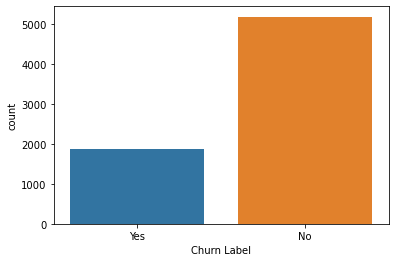

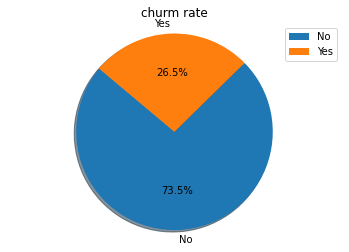

In [144]:
var_gender='Churn Label'
print(data[var_gender].unique())
y=data[var_gender]
ax = sns.countplot(y,label="Churn Label")     
no, yes = y.value_counts()
print('Number of yes: ',yes)
print('Number of no : ',no)
print('pourcentage')
print('pourcentage value of yes:',float(yes)*100/float(yes+no),'%')
print('pourcentage value of no :',float(no)*100/float(yes+no),'%')
plt.show()
labels='No','Yes'
m=float(yes)*100/float(yes+no)
f=float(no)*100/float(yes+no)
sizes=data['Churn Label'].value_counts()
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=labels)
plt.title("churm rate")
plt.axis('equal')
plt.show()

The column of Churn Label is like the column Churn Value but the difference is the values 'Yes' ,'No' in Churn Label and 1, 0 in Churn Value

C:\Products\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Products\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


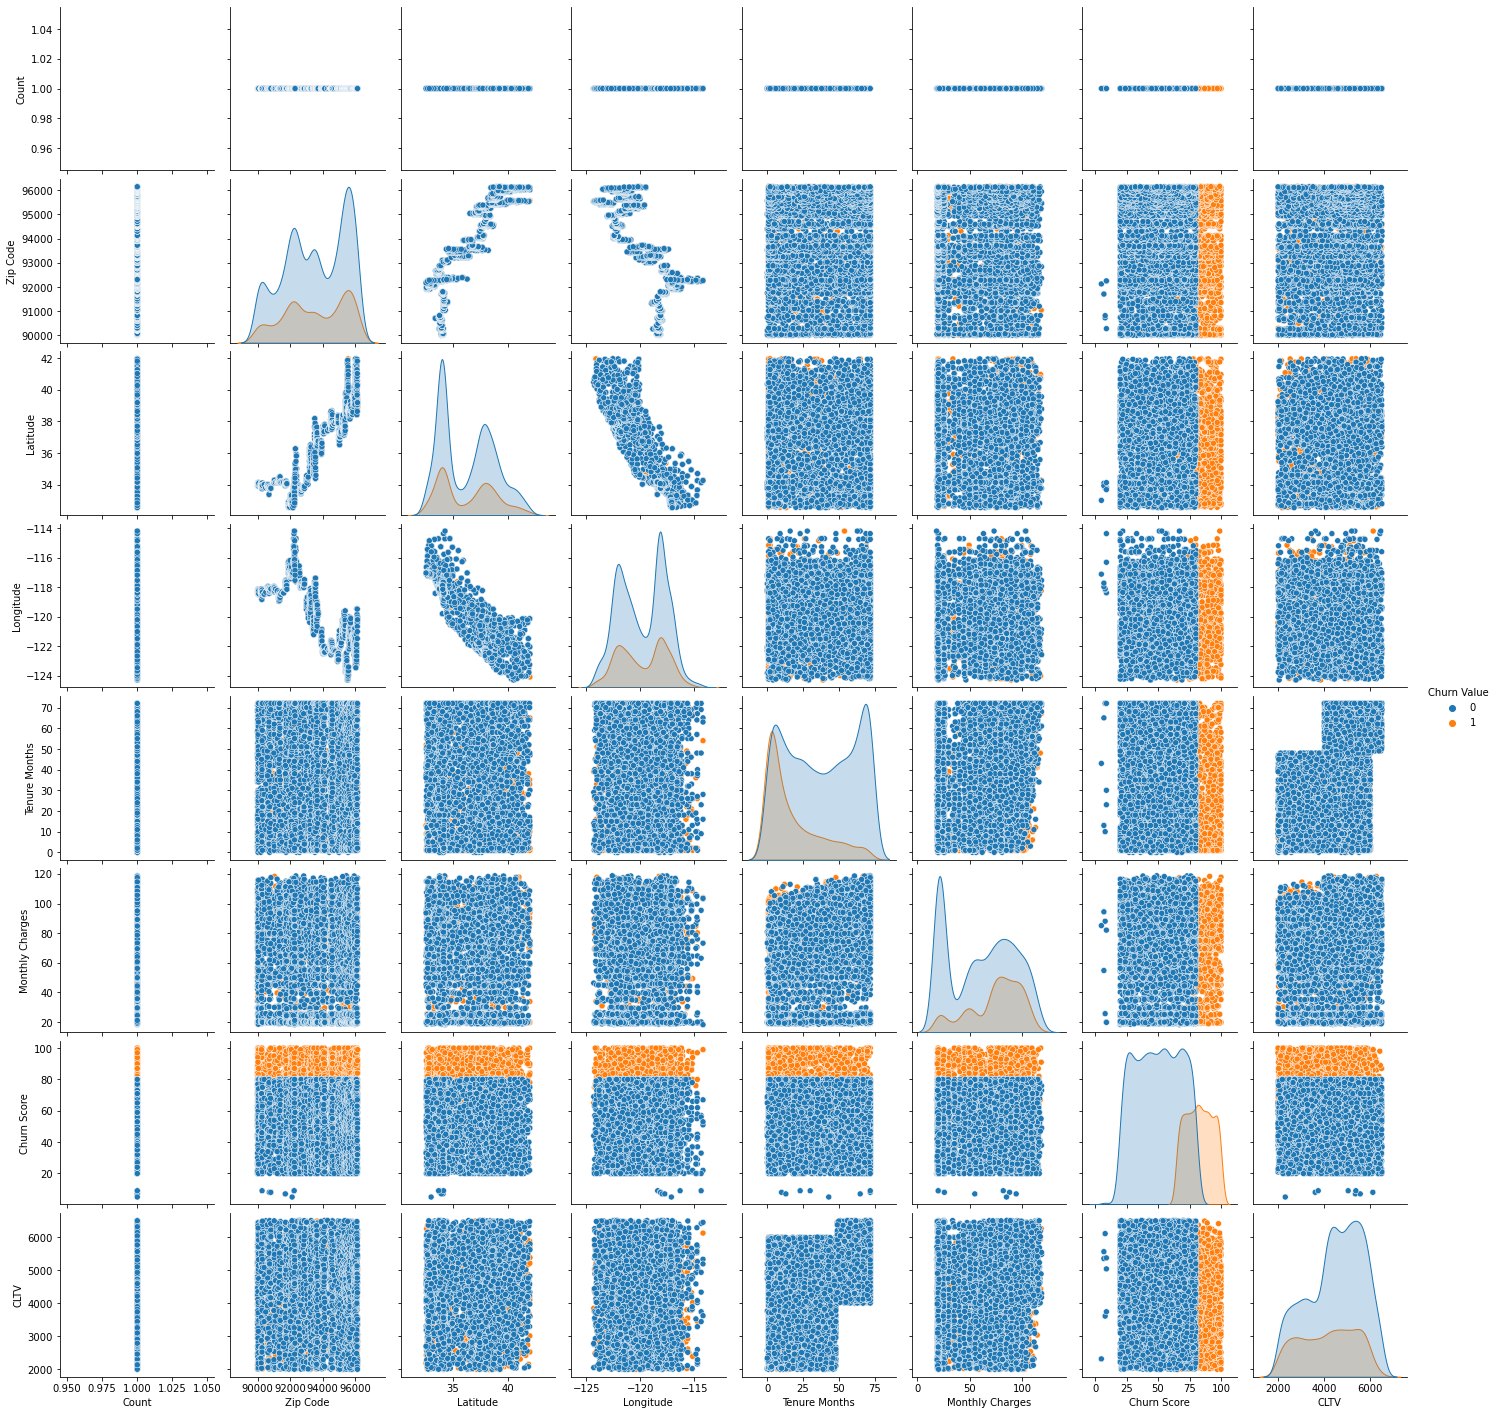

In [145]:
sns.pairplot(data, hue='Churn Value', height=2.5)

# Gender 

In [146]:
var_gender='Gender'
print(data[var_gender].unique())
y=data[var_gender]

['Male' 'Female']


In [147]:
male, female = y.value_counts()
print('Number of Male: ',male)
print('Number of Female : ',female)
print('pourcentage')
print('pourcentage value of Male:',float(male)*100/float(male+female),'%')
print('pourcentage value of Yes :',float(female)*100/float(male+female),'%')

Number of Male:  3555
Number of Female :  3488
pourcentage
pourcentage value of Male: 50.475649581144395 %
pourcentage value of Yes : 49.524350418855605 %


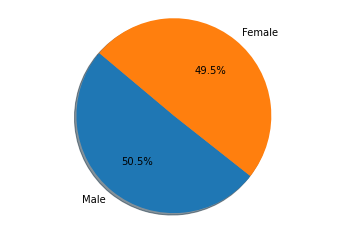

In [148]:
labels='Male','Female'
m=float(male)*100/float(male+female)
f=float(female)*100/float(male+female)
sizes=data['Gender'].value_counts()
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

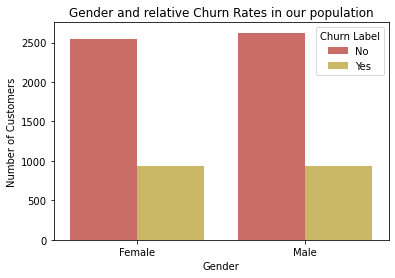

In [149]:
gb = data.groupby("Gender")["Churn Label"].value_counts().to_frame().rename({"Churn Label": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Gender", y = "Number of Customers", data = gb, hue = "Churn Label", palette = sns.color_palette("hls", 8)).set_title("Gender and relative Churn Rates in our population");

# Age 

In [150]:
var_senior_citizen='Senior Citizen'
print(data[var_senior_citizen].unique())
y=data[var_senior_citizen]

['No' 'Yes']


In [151]:
no_old, old = y.value_counts()
print('Number of No: ',no_old)
print('Number of Yes : ',old)
print('pourcentage')
print('pourcentage of No:',float(no_old)*100/float(no_old+old),'%')
print('pourcentage of Yes :',float(old)*100/float(no_old+old),'%')

Number of No:  5901
Number of Yes :  1142
pourcentage
pourcentage of No: 83.78531875621184 %
pourcentage of Yes : 16.21468124378816 %


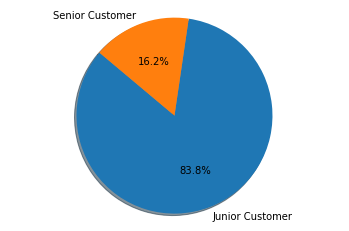

In [152]:
labels='Junior Customer','Senior Customer'
m=float(no_old)*100/float(no_old+old)
f=float(no_old)*100/float(no_old+old)
sizes=data['Senior Citizen'].value_counts()
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

  Senior Citizen Churn Label  Number of Customers
0          Young          No                 4508
1          Young         Yes                 1393
2         Senior          No                  666
3         Senior         Yes                  476


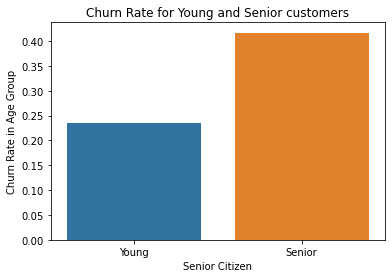

In [153]:
gb = data.groupby("Senior Citizen")["Churn Label"].value_counts().to_frame().rename({"Churn Label": "Number of Customers"}, axis = 1).reset_index()
gb["Senior Citizen"].replace(to_replace ="No", value ="Young", inplace = True)
gb["Senior Citizen"].replace(to_replace ="Yes", value ="Senior", inplace = True)
print(gb)
tp = gb.groupby("Senior Citizen")["Number of Customers"].sum().to_frame().reset_index().rename({"Number of Customers": "# Customers in Age Group"}, axis = 1)
gb = pd.merge(gb, tp, on = "Senior Citizen")
gb["Churn Rate in Age Group"] = gb["Number of Customers"]/gb["# Customers in Age Group"]
gb = gb[gb["Churn Label"] == "Yes"]

sns.barplot(x = "Senior Citizen", y = "Churn Rate in Age Group", data = gb).set_title("Churn Rate for Young and Senior customers");

# Partner

Number of No:  5901
Number of Yes :  1142
pourcentage
pourcentage of No: 83.78531875621184 %
pourcentage of Yes : 16.21468124378816 %


C:\Products\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


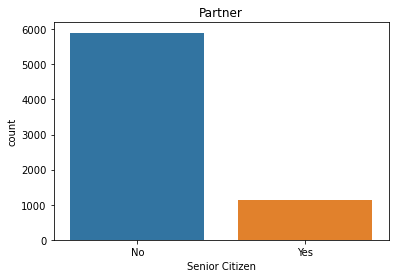

In [154]:
import seaborn as sns
ax = sns.countplot(y,label="Count").set_title("Partner")    
no_partner, partner = y.value_counts()
print('Number of No: ',no_partner)
print('Number of Yes : ',partner)
print('pourcentage')
print('pourcentage of No:',float(no_partner)*100/float(no_partner+partner),'%')
print('pourcentage of Yes :',float(partner)*100/float(no_partner+partner),'%')

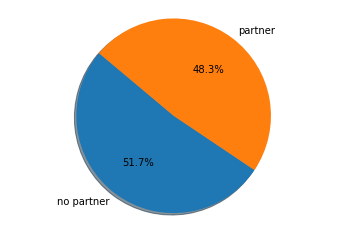

In [155]:
labels='no partner','partner'
m=float(no_partner)*100/float(no_partner+partner)
f=float(no_partner)*100/float(no_partner+partner)
sizes=data['Partner'].value_counts()
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

# Longtitude and Latitude 

In [156]:
x=data['Latitude']
y=data['Longitude']
#sns.displot(data, x=x, y=y, hue="Churn Value", kind="kde")

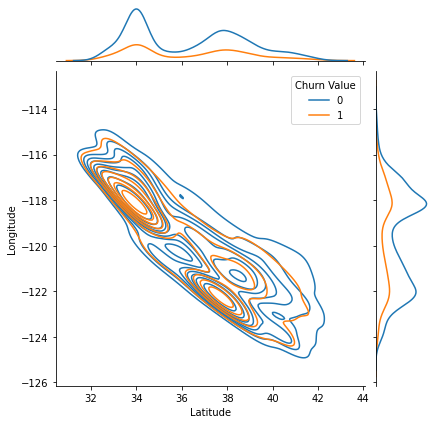

In [157]:
x=data['Latitude']
y=data['Longitude']

sns.jointplot(
    data=data,
    x=x, y=y, hue="Churn Value",
    kind="kde"
)

# Online Backup

In [158]:
df['Online Backup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

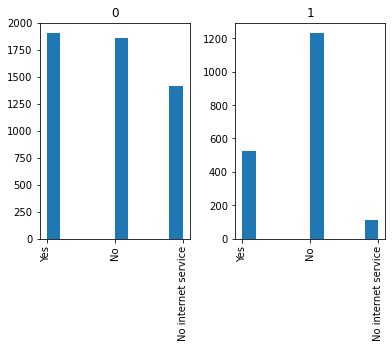

In [159]:
df.hist(column='Online Backup',by='Churn Value',grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None,);

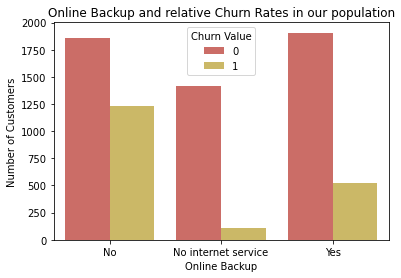

In [160]:
gb = df.groupby("Online Backup")["Churn Value"].value_counts().to_frame().rename({"Churn Value": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Online Backup", y = "Number of Customers", data = gb, hue = "Churn Value", palette = sns.color_palette("hls", 8)).set_title("Online Backup and relative Churn Rates in our population");

Clients with Online Backup have lower churn rate than those who don't have Online Backup

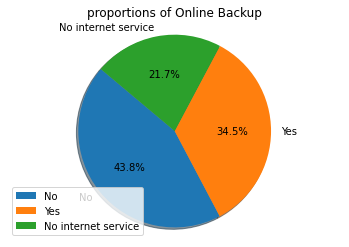

In [161]:
sizes=df['Online Backup'].value_counts()
labels='No','Yes','No internet service'
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=labels)
plt.title("proportions of Online Backup")
plt.axis('equal')
plt.show()


# Device Protection 

In [162]:
df['Device Protection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

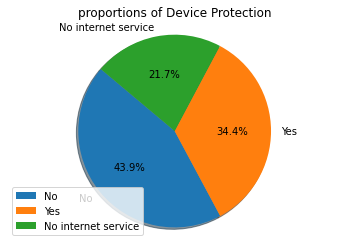

In [163]:
sizes=df['Device Protection'].value_counts()
labels='No','Yes','No internet service'
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=labels)
plt.title("proportions of Device Protection")
plt.axis('equal')
plt.show()

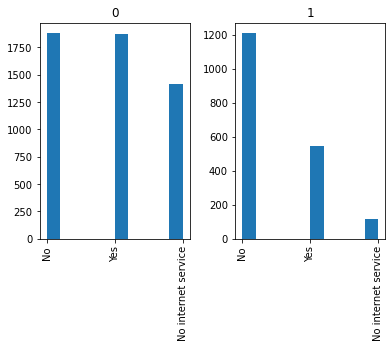

In [164]:
df.hist(column='Device Protection',by='Churn Value',grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None,);

the rate of churn is much higher with the clients that have no device protection  

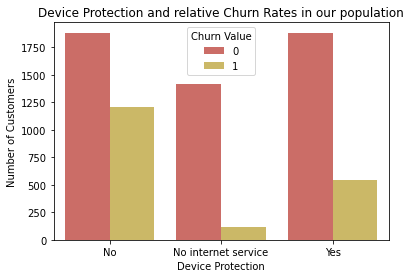

In [165]:
gb = df.groupby("Device Protection")["Churn Value"].value_counts().to_frame().rename({"Churn Value": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Device Protection", y = "Number of Customers", data = gb, hue = "Churn Value", palette = sns.color_palette("hls", 8)).set_title("Device Protection and relative Churn Rates in our population");

# Tech Support

In [166]:
df['Tech Support'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

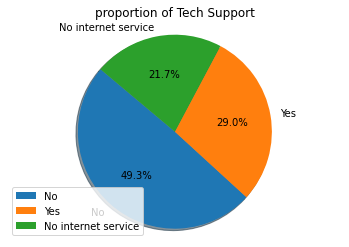

In [167]:
sizes=df['Tech Support'].value_counts()
labels='No','Yes','No internet service'
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=labels)
plt.title("proportion of Tech Support")
plt.axis('equal')
plt.show()

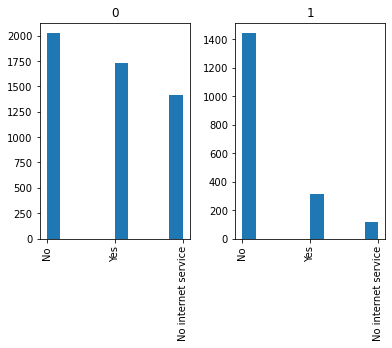

In [168]:
df.hist(column='Tech Support',by='Churn Value',grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None,);

The Customers with no tech supports have the highest churn rate 

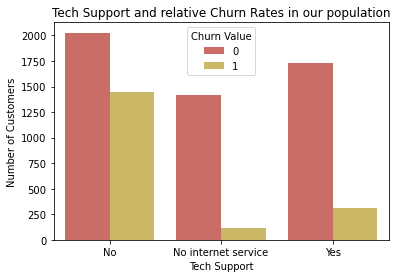

In [169]:
gb = df.groupby("Tech Support")["Churn Value"].value_counts().to_frame().rename({"Churn Value": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Tech Support", y = "Number of Customers", data = gb, hue = "Churn Value", palette = sns.color_palette("hls", 8)).set_title("Tech Support and relative Churn Rates in our population");

# Streaming Tv

In [170]:
df['Streaming TV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

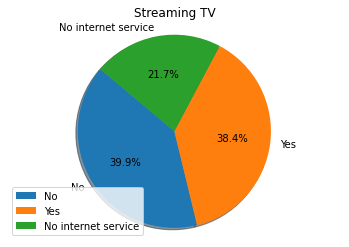

In [171]:
sizes=df['Streaming TV'].value_counts()
labels='No','Yes','No internet service'
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=labels)
plt.title("Streaming TV")
plt.axis('equal')
plt.show()

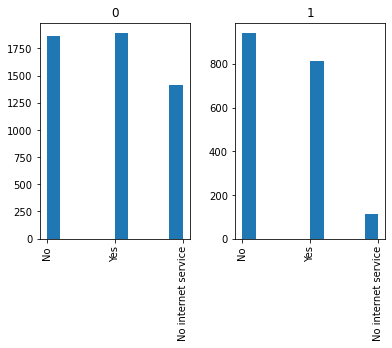

In [172]:
df.hist(column='Streaming TV',by='Churn Value',grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None,);

Text(0.5, 1.0, 'Streaming TV and relative Churn Rates in our population')

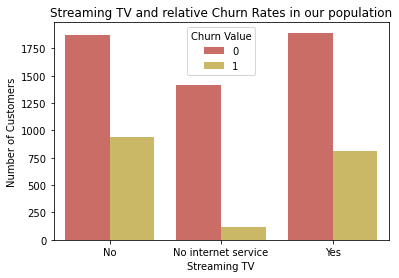

In [173]:
gb = df.groupby("Streaming TV")["Churn Value"].value_counts().to_frame().rename({"Churn Value": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Streaming TV", y = "Number of Customers", data = gb, hue = "Churn Value", palette = sns.color_palette("hls", 8)).set_title("Streaming TV and relative Churn Rates in our population")

We can't conclude anything based on this distribution 

# Streaming Movies

In [174]:
df['Streaming Movies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

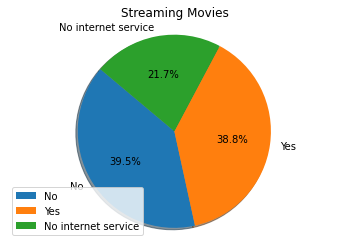

In [175]:
sizes=df['Streaming Movies'].value_counts()
labels='No','Yes','No internet service'
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=labels)
plt.title("Streaming Movies")
plt.axis('equal')
plt.show()

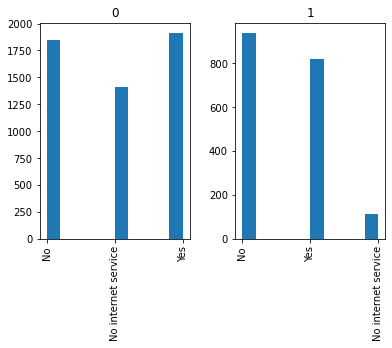

In [176]:
df.hist(column='Streaming Movies',by='Churn Value',grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None,);

We can't conclude anything based on this distribution

Text(0.5, 1.0, 'Streaming Movies and relative Churn Rates in our population')

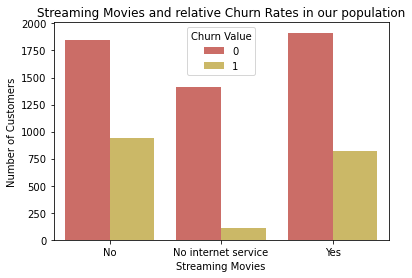

In [177]:
gb = df.groupby("Streaming Movies")["Churn Value"].value_counts().to_frame().rename({"Churn Value": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Streaming Movies", y = "Number of Customers", data = gb, hue = "Churn Value", palette = sns.color_palette("hls", 8)).set_title("Streaming Movies and relative Churn Rates in our population")

# Contracts

In [178]:
df['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

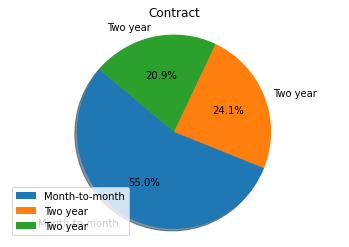

In [179]:
sizes=df['Contract'].value_counts()
labels='Month-to-month','Two year','Two year'
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=labels)
plt.title("Contract")
plt.axis('equal')
plt.show()

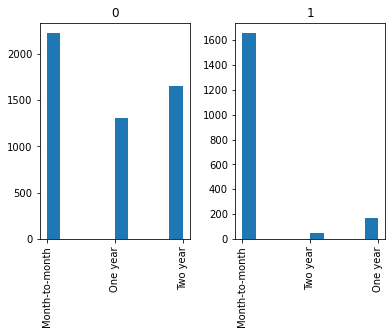

In [180]:
df.hist(column='Contract',by='Churn Value',grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None,);

Text(0.5, 1.0, 'Contract and relative Churn Rates in our population')

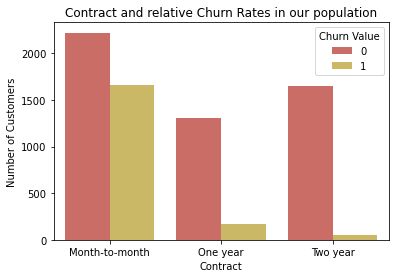

In [181]:
gb = df.groupby("Contract")["Churn Value"].value_counts().to_frame().rename({"Churn Value": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Contract", y = "Number of Customers", data = gb, hue = "Churn Value", palette = sns.color_palette("hls", 8)).set_title("Contract and relative Churn Rates in our population")

Customers with month-to-month subscribtion have the highest churn rate

# Paperless Billing

In [182]:
df['Paperless Billing'].unique()

array(['Yes', 'No'], dtype=object)

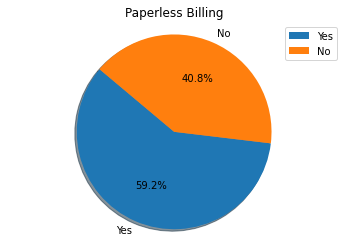

In [183]:
sizes=df['Paperless Billing'].value_counts()
labels='Yes','No'
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=labels)
plt.title("Paperless Billing")
plt.axis('equal')
plt.show()

# Partner

les client dont partner=no ont plus de chance de churn


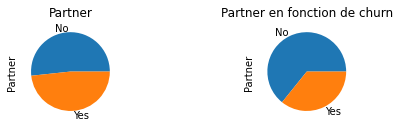

In [184]:
plt.subplot(1, 3, 1)
plt.title('Partner')
df['Partner'].value_counts().plot.pie()


plt.subplot(1, 3, 3)
plt.title('Partner en fonction de churn')
mask1=df['Churn Value']==1
df[mask1]['Partner'].value_counts().plot.pie()
print('les client dont partner=no ont plus de chance de churn')

# Dependents

les client dont Dependents=no ont plus de chance de churn


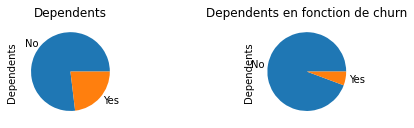

In [185]:
plt.subplot(1, 3, 1)
plt.title('Dependents')
data['Dependents'].value_counts().plot.pie()


plt.subplot(1, 3, 3)
plt.title('Dependents en fonction de churn')
mask1=df['Churn Value']==1
df[mask1]['Dependents'].value_counts().plot.pie()
print('les client dont Dependents=no ont plus de chance de churn')

# Phone Service 

c est presque la meme courbe donc Phone Service n as pas d importance


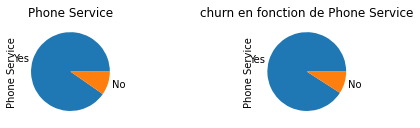

In [186]:
plt.subplot(1, 3, 1)
plt.title('Phone Service')
data['Phone Service'].value_counts().plot.pie()


plt.subplot(1, 3, 3)
plt.title('churn en fonction de Phone Service')
mask1=data['Churn Value']==1
data[mask1]['Phone Service'].value_counts().plot.pie()
print('c est presque la meme courbe donc Phone Service n as pas d importance')

# Multiple lines

les client dont Multiple Lines=yes ont plus de chance de churn


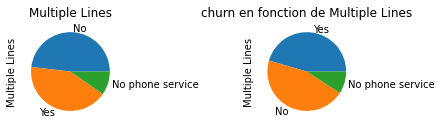

In [187]:
plt.subplot(1, 3, 1)
plt.title('Multiple Lines')
data['Multiple Lines'].value_counts().plot.pie()


plt.subplot(1, 3, 3)
plt.title('churn en fonction de Multiple Lines')
mask1=data['Churn Value']==1
data[mask1]['Multiple Lines'].value_counts().plot.pie()
print('les client dont Multiple Lines=yes ont plus de chance de churn')

# Internet Service

les client dont Internet Service=fiber optic ont plus de chance de churn


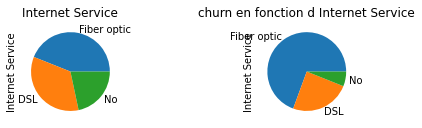

In [188]:
plt.subplot(1, 3, 1)
plt.title('Internet Service')
data['Internet Service'].value_counts().plot.pie()


plt.subplot(1, 3, 3)
plt.title('churn en fonction d Internet Service')
mask1=data['Churn Value']==1
data[mask1]['Internet Service'].value_counts().plot.pie()
print('les client dont Internet Service=fiber optic ont plus de chance de churn')

# Online Security

les client dont Online Security=no ont plus de chance de churn


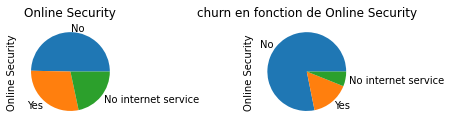

In [189]:
plt.subplot(1, 3, 1)
plt.title('Online Security')
data['Online Security'].value_counts().plot.pie()


plt.subplot(1, 3, 3)
plt.title('churn en fonction de Online Security')
mask1=data['Churn Value']==1
data[mask1]['Online Security'].value_counts().plot.pie()
print('les client dont Online Security=no ont plus de chance de churn')

# Online Backup

les client dont Online Backup=no ont plus de chance de churn


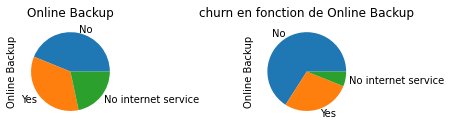

In [190]:
plt.subplot(1, 3, 1)
plt.title('Online Backup')
data['Online Backup'].value_counts().plot.pie()


plt.subplot(1, 3, 3)
plt.title('churn en fonction de Online Backup')
mask1=data['Churn Value']==1
data[mask1]['Online Backup'].value_counts().plot.pie()
print('les client dont Online Backup=no ont plus de chance de churn')

## Churn Value 

In [191]:
import pandas as pd
data7=pd.read_csv ('Telco.csv')
data7


CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
7038  2569-WGERO      1  United States  California       Landers     92285   
7039  6840-RESVB      1  United States  California      Adelanto     92301   
7040  2234-XADUH      1  United States  California         Amboy     92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK      1  United States  California  Apple Valley     92308   

                    Lat Long   Latitude   Longitude  Gender  ...  \
0     33.964131, -118.272783  33.964131 -118.272783    Male  ...   
1      34.059281, -118.30742  34.059281 -118.307420  Female  ...   
2     34.048013, -118.293953  34.048013 -118.293953  Female  ...   
3     34.062125, -118.315709  34.062125 -118.315709  Female  ...   
4     34.039224, -118.266293  34.039224 -118.266293    Male  ...   
...                      ...        ...         ...     ...  ...   
7038  34.341737, -116.539416  34.341737 -116.539416  Female  ...   
7039  34.667815, -117.536183  34.667815 -117.536183    Male  ...   
7040  34.559882, -115.637164  34.559882 -115.637164  Female  ...   
7041     34.1678, -116.86433  34.167800 -116.864330  Female  ...   
7042  34.424926, -117.184503  34.424926 -117.184503    Male  ...   

            Contract Paperless Billing             Payment Method  \
0     Month-to-month               Yes               Mailed check   
1     Month-to-month               Yes           Electronic check   
2     Month-to-month               Yes           Electronic check   
3     Month-to-month               Yes           Electronic check   
4     Month-to-month               Yes  Bank transfer (automatic)   
...              ...               ...                        ...   
7038        Two year               Yes  Bank transfer (automatic)   
7039        One year               Yes               Mailed check   
7040        One year               Yes    Credit card (automatic)   
7041  Month-to-month               Yes           Electronic check   
7042        Two year               Yes  Bank transfer (automatic)   

      Monthly Charges Total Charges Churn Label Churn Value Churn Score  CLTV  \
0               53.85        108.15         Yes           1          86  3239   
1               70.70        151.65         Yes           1          67  2701   
2               99.65         820.5         Yes           1          86  5372   
3              104.80       3046.05         Yes           1          84  5003   
4              103.70        5036.3         Yes           1          89  5340   
...               ...           ...         ...         ...         ...   ...   
7038            21.15        1419.4          No           0          45  5306   
7039            84.80        1990.5          No           0          59  2140   
7040           103.20        7362.9          No           0          71  5560   
7041            29.60        346.45          No           0          59  2793   
7042           105.65        6844.5          No           0          38  5097   

                       Churn Reason  
0      Competitor made better offer  
1                             Moved  
2                             Moved  
3                             Moved  
4     Competitor had better devices  
...                             ...  
7038                            NaN  
7039                            NaN  
7040                            NaN  
7041                            NaN  
7042                            

In [192]:
import seaborn as sns
data7 = data.iloc[:,26:]
data7.head()

Monthly Charges Total Charges Churn Label  Churn Value  Churn Score  CLTV  \
0            53.85        108.15         Yes            1           86  3239   
1            70.70        151.65         Yes            1           67  2701   
2            99.65         820.5         Yes            1           86  5372   
3           104.80       3046.05         Yes            1           84  5003   
4           103.70        5036.3         Yes            1           89  5340   

                    Churn Reason  
0   Competitor made better offer  
1                          Moved  
2                          Moved  
3                          Moved  
4  Competitor had better devices

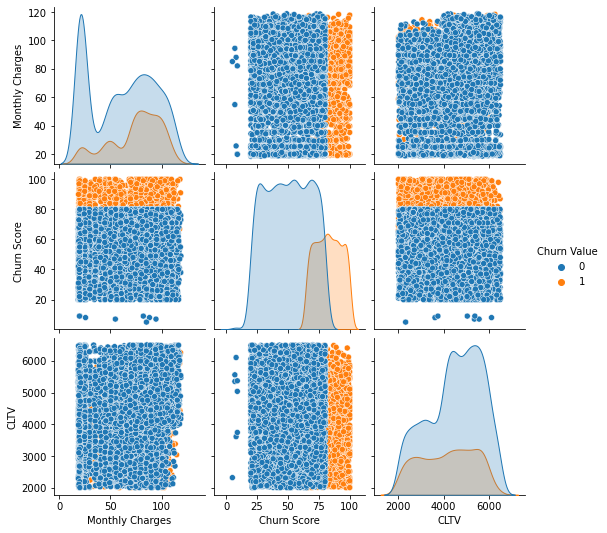

In [193]:
sns.pairplot(data7, hue='Churn Value')

## Churn Label et Churn Value 

In [194]:
data['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

In [195]:
y = data['Churn Value'].value_counts()
y

0    5174
1    1869
Name: Churn Value, dtype: int64

Les deux variables sont équivalentes => On choisit Churn Value (0 : NO et 1 : YES)

<AxesSubplot:ylabel='Churn Value'>

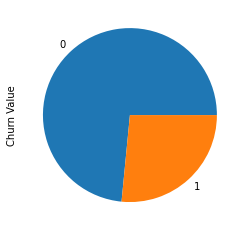

In [196]:
import seaborn as sns 
data['Churn Value'].value_counts().plot.pie()

le pourcentage des clients qui continuent à utuliser le service est presque 3 fois que les clients qui desabonnent 

## Monthly Charges 

In [197]:
mc = data['Monthly Charges']
mc.describe()


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly Charges, dtype: float64

En moyenne, la consommation mensuelle d'un client est 64 euro 

(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

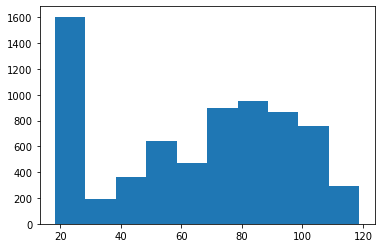

In [198]:
import matplotlib.pyplot as plt
plt.hist(mc)

la mojirite des clients ont une consomation mensuelle vaut entre 20 et 30 euro

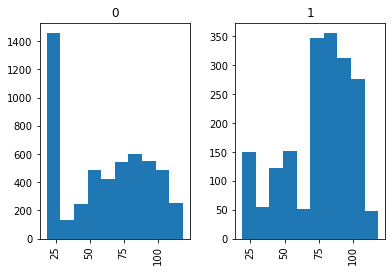

In [199]:
#histogrammes de la consommation mensuelle selon "Churn Value"
data.hist(column='Monthly Charges',by='Churn Value');

ceux qui veullent changer telco ont une grande consomation mensuelle et l'inverse pour ceux qui veullent garder le service

## Total Charges 

In [200]:
import numpy as np
tc =  data['Total Charges']
tc.describe()

count     7043
unique    6531
top       20.2
freq        11
Name: Total Charges, dtype: object

In [201]:
tc[2234]

' '

In [202]:
tc.replace({' ': "0"}, inplace=True)

float_tc = []
for i in range(0,len(tc)) :
    float_tc.append(np.float64(tc[i]))

In [203]:
data['Total Charges'] = float_tc
data['Total Charges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: Total Charges, dtype: float64

(array([2701., 1227.,  685.,  503.,  460.,  414.,  396.,  311.,  224.,
         122.]),
 array([   0.  ,  868.48, 1736.96, 2605.44, 3473.92, 4342.4 , 5210.88,
        6079.36, 6947.84, 7816.32, 8684.8 ]),
 <BarContainer object of 10 artists>)

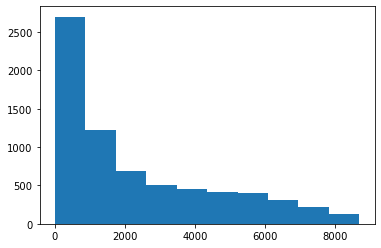

In [204]:
plt.hist(data['Total Charges'])

la majorite des clients consomme annuellement entre 0 et 2000 
, si le " tolal charge" augmente le nombre des clients diminue


la majorite des clients consomme annuellement entre 0 et 2000 
, si le " tolal charge" augmente le nombre des clients diminue


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

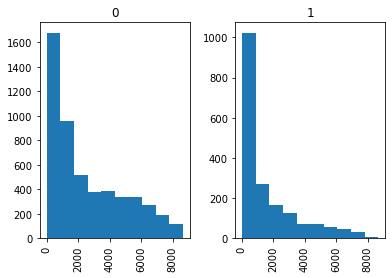

In [205]:
data.hist(column='Total Charges',by='Churn Value')

le nombre des clients qui veulent garder le service ayant une consommation entre 0 et 2000 est plus elevé que les autres 

## Churn Score 

In [206]:
cs =  data['Churn Score']
cs.describe()

count    7043.000000
mean       58.699418
std        21.525131
min         5.000000
25%        40.000000
50%        61.000000
75%        75.000000
max       100.000000
Name: Churn Score, dtype: float64

Le score prend des valeurs entre 5 et 100 , de moyenne 58.69

(array([   8.,  327.,  857.,  730.,  850.,  773., 1227., 1221.,  551.,
         499.]),
 array([  5. ,  14.5,  24. ,  33.5,  43. ,  52.5,  62. ,  71.5,  81. ,
         90.5, 100. ]),
 <BarContainer object of 10 artists>)

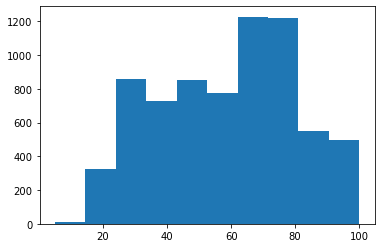

In [207]:
plt.hist(data['Churn Score'])

La majorité des clients ont un score entre 70 et 80  

## Churn Score et Churn Value

<AxesSubplot:xlabel='Churn Score'>

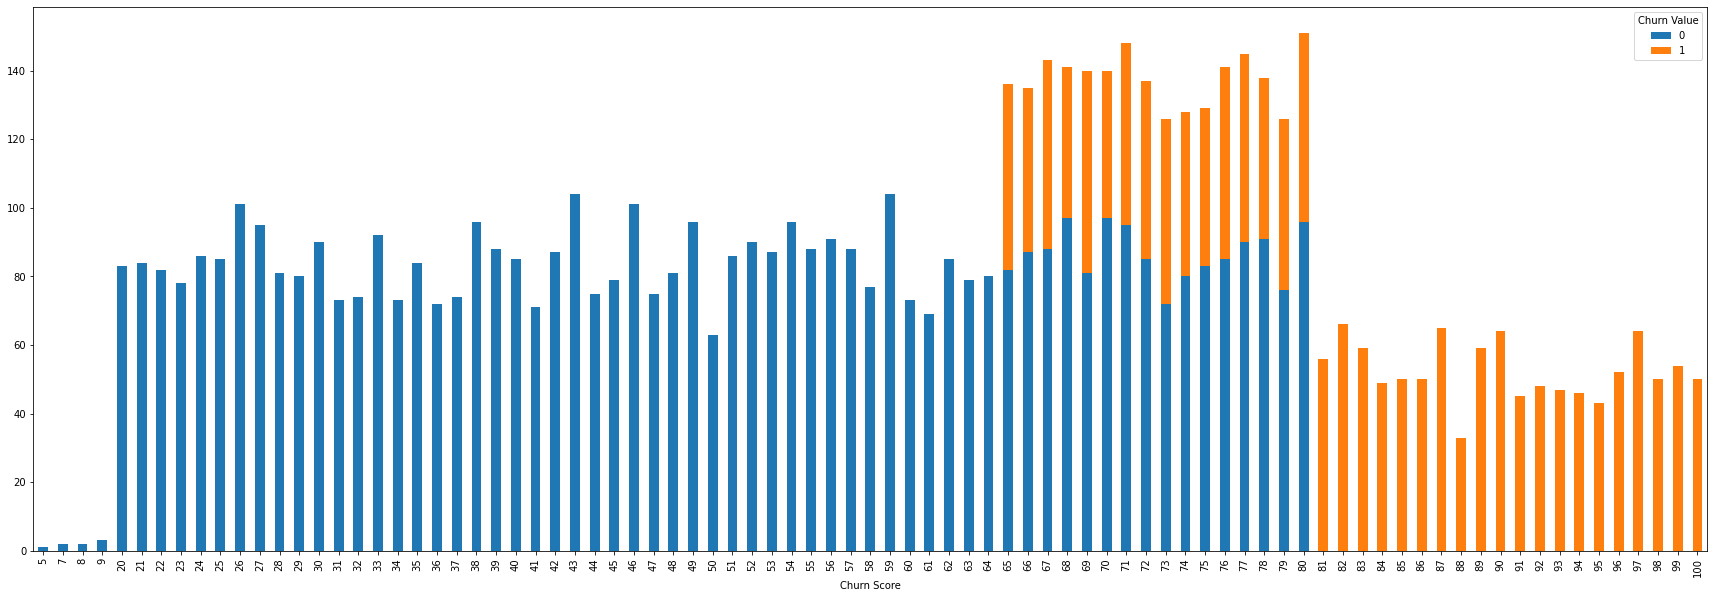

In [208]:
data.groupby(["Churn Score", "Churn Value"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

## CLTV : customer lifetime value

In [209]:
cltv =  data['CLTV']
cltv.describe()

count    7043.000000
mean     4400.295755
std      1183.057152
min      2003.000000
25%      3469.000000
50%      4527.000000
75%      5380.500000
max      6500.000000
Name: CLTV, dtype: float64

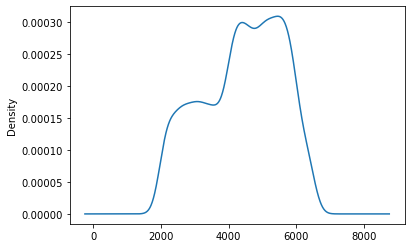

In [210]:
# densité 
data['CLTV'].plot.kde();

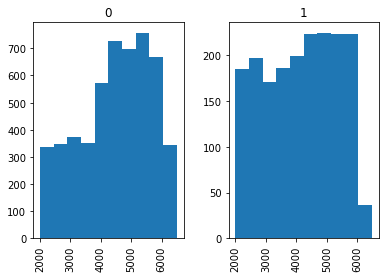

In [211]:
data.hist(column='CLTV',by='Churn Value');

pour churn value=0 :
    les clients ayant CLTV entre 4000 et 6000 (les anciens clients) sont satisfaits du services (700 clients)
pour churn value=1 :
    tous les clients ne sont pas satisfaits independapent de CLTV

## Churn Reason

In [212]:
cr =  data['Churn Reason']
cr.describe()

count                           1869
unique                            20
top       Attitude of support person
freq                             192
Name: Churn Reason, dtype: object

In [213]:
data['Churn Reason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Long distance charges                         44
Limited range of services                     44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn Reason, 

C:\Products\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

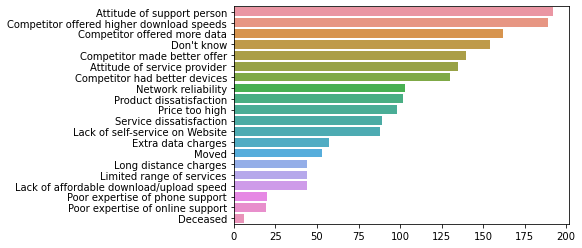

In [214]:
import seaborn as sns 
y = data['Churn Reason'].value_counts()
sns.barplot( y.values,y.index )

Les raisons majeurs de désabonnement des clients sont : 
les attitudes des "support person" ainsi que la rapidité des téléchargements et les services offerts par les concurrents. 


# Ordinal Encoder

In [215]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df1=df
df1["Gender_code"] = ord_enc.fit_transform(df1[["Gender"]])
#df1["Gender"] = np.where(obj_df["engine_type"].str.contains("ohc"), 1, 0)

In [216]:
df1[["Gender","Gender_code"]].head(20)

Gender  Gender_code
0     Male          1.0
1   Female          0.0
2   Female          0.0
3   Female          0.0
4     Male          1.0
5   Female          0.0
6     Male          1.0
7     Male          1.0
8     Male          1.0
9     Male          1.0
10  Female          0.0
11    Male          1.0
12    Male          1.0
13  Female          0.0
14  Female          0.0
15  Female          0.0
16  Female          0.0
17    Male          1.0
18  Female          0.0
19  Female          0.0

In [217]:
ord_enc = OrdinalEncoder()
df1=df
df1["Online Backup_code"] = ord_enc.fit_transform(df1[["Online Backup"]])
#df1["Gender"] = np.where(obj_df["engine_type"].str.contains("ohc"), 1, 0)

In [218]:
df1[["Online Backup_code","Online Backup"]]

Online Backup_code        Online Backup
0                    2.0                  Yes
1                    0.0                   No
2                    0.0                   No
3                    0.0                   No
4                    2.0                  Yes
...                  ...                  ...
7038                 1.0  No internet service
7039                 0.0                   No
7040                 2.0                  Yes
7041                 0.0                   No
7042                 0.0                   No

[7043 rows x 2 columns]

# NORMALISATION

In [219]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df1["Monthly Charges_minmax"] = min_max_scaler.fit_transform(df1[["Monthly Charges"]])

In [220]:
df1[["Monthly Charges_minmax","Monthly Charges"]]

Monthly Charges_minmax  Monthly Charges
0                   0.354229            53.85
1                   0.521891            70.70
2                   0.809950            99.65
3                   0.861194           104.80
4                   0.850249           103.70
...                      ...              ...
7038                0.028856            21.15
7039                0.662189            84.80
7040                0.845274           103.20
7041                0.112935            29.60
7042                0.869652           105.65

[7043 rows x 2 columns]

In [221]:
df.head()

City  Zip Code                Lat Long   Latitude   Longitude  \
0  Los Angeles     90003  33.964131, -118.272783  33.964131 -118.272783   
1  Los Angeles     90005   34.059281, -118.30742  34.059281 -118.307420   
2  Los Angeles     90006  34.048013, -118.293953  34.048013 -118.293953   
3  Los Angeles     90010  34.062125, -118.315709  34.062125 -118.315709   
4  Los Angeles     90015  34.039224, -118.266293  34.039224 -118.266293   

   Gender Senior Citizen Partner Dependents  Tenure Months  ...  \
0    Male             No      No         No              2  ...   
1  Female             No      No        Yes              2  ...   
2  Female             No      No        Yes              8  ...   
3  Female             No     Yes        Yes             28  ...   
4    Male             No      No        Yes             49  ...   

              Payment Method Monthly Charges Total Charges Churn Value  \
0               Mailed check           53.85        108.15           1   
1           Electronic check           70.70        151.65           1   
2           Electronic check           99.65         820.5           1   
3           Electronic check          104.80       3046.05           1   
4  Bank transfer (automatic)          103.70        5036.3           1   

  Churn Score  CLTV                   Churn Reason Gender_code  \
0          86  3239   Competitor made better offer         1.0   
1          67  2701                          Moved         0.0   
2          86  5372                          Moved         0.0   
3          84  5003                          Moved         0.0   
4          89  5340  Competitor had better devices         1.0   

  Online Backup_code Monthly Charges_minmax  
0                2.0               0.354229  
1                0.0               0.521891  
2                0.0               0.809950  
3                0.0               0.861194  
4                2.0               0.850249  

[5 rows x 31 columns]

In [222]:
To_drop=['Churn Reason']
df=df.drop(To_drop,axis=1)

In [223]:
df.head()

City  Zip Code                Lat Long   Latitude   Longitude  \
0  Los Angeles     90003  33.964131, -118.272783  33.964131 -118.272783   
1  Los Angeles     90005   34.059281, -118.30742  34.059281 -118.307420   
2  Los Angeles     90006  34.048013, -118.293953  34.048013 -118.293953   
3  Los Angeles     90010  34.062125, -118.315709  34.062125 -118.315709   
4  Los Angeles     90015  34.039224, -118.266293  34.039224 -118.266293   

   Gender Senior Citizen Partner Dependents  Tenure Months  ...  \
0    Male             No      No         No              2  ...   
1  Female             No      No        Yes              2  ...   
2  Female             No      No        Yes              8  ...   
3  Female             No     Yes        Yes             28  ...   
4    Male             No      No        Yes             49  ...   

  Paperless Billing             Payment Method Monthly Charges Total Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65         820.5   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70        5036.3   

  Churn Value Churn Score  CLTV Gender_code Online Backup_code  \
0           1          86  3239         1.0                2.0   
1           1          67  2701         0.0                0.0   
2           1          86  5372         0.0                0.0   
3           1          84  5003         0.0                0.0   
4           1          89  5340         1.0                2.0   

  Monthly Charges_minmax  
0               0.354229  
1               0.521891  
2               0.809950  
3               0.861194  
4               0.850249  

[5 rows x 30 columns]

All customers who left have Churn Reasons

# Total charges convert to float 

In [224]:
try:
    df["Total Charges"].astype("float64")
except ValueError:
    print("We can't convert this column to floats, there must be some non-convertible values")

We can't convert this column to floats, there must be some non-convertible values


In [225]:
df.dtypes

City                       object
Zip Code                    int64
Lat Long                   object
Latitude                  float64
Longitude                 float64
Gender                     object
Senior Citizen             object
Partner                    object
Dependents                 object
Tenure Months               int64
Phone Service              object
Multiple Lines             object
Internet Service           object
Online Security            object
Online Backup              object
Device Protection          object
Tech Support               object
Streaming TV               object
Streaming Movies           object
Contract                   object
Paperless Billing          object
Payment Method             object
Monthly Charges           float64
Total Charges              object
Churn Value                 int64
Churn Score                 int64
CLTV                        int64
Gender_code               float64
Online Backup_code        float64
Monthly Charge

In [226]:
print(df["Total Charges"].value_counts().head(n=10))

20.2     11
         11
19.75     9
20.05     8
19.65     8
19.9      8
45.3      7
19.55     7
19.45     6
20.15     6
Name: Total Charges, dtype: int64


we have 11 observations with an empty string value

In [227]:
print(df["Total Charges"].value_counts().index[0])

20.2


we will drop the empty observations and reset the index so we can convert Total Charges column to float 

In [228]:
df.drop(df[df['Total Charges'] == " "].index, axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

In [229]:
df.shape

(7032, 30)

In [230]:
df["Total Charges"] = df["Total Charges"].astype("float64")

Text(0, 0.5, 'number of persons')

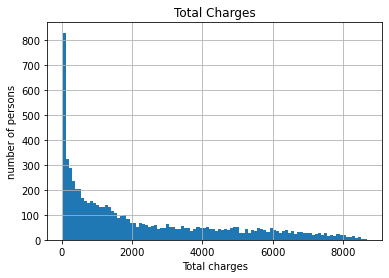

In [231]:
df.hist(column='Total Charges',bins=100);
plt.xlabel('Total charges')
plt.ylabel('number of persons')

In [232]:
print(df.dtypes)

City                       object
Zip Code                    int64
Lat Long                   object
Latitude                  float64
Longitude                 float64
Gender                     object
Senior Citizen             object
Partner                    object
Dependents                 object
Tenure Months               int64
Phone Service              object
Multiple Lines             object
Internet Service           object
Online Security            object
Online Backup              object
Device Protection          object
Tech Support               object
Streaming TV               object
Streaming Movies           object
Contract                   object
Paperless Billing          object
Payment Method             object
Monthly Charges           float64
Total Charges             float64
Churn Value                 int64
Churn Score                 int64
CLTV                        int64
Gender_code               float64
Online Backup_code        float64
Monthly Charge

In [233]:
columns_to_convert = ['Partner', 
                      'Dependents', 
                      'Phone Service', 
                      'Paperless Billing', 
                      ]

for item in columns_to_convert:
    df[item].replace(to_replace='Yes', value=1, inplace=True)
    df[item].replace(to_replace='No',  value=0, inplace=True)
df.head()

City  Zip Code                Lat Long   Latitude   Longitude  \
0  Los Angeles     90003  33.964131, -118.272783  33.964131 -118.272783   
1  Los Angeles     90005   34.059281, -118.30742  34.059281 -118.307420   
2  Los Angeles     90006  34.048013, -118.293953  34.048013 -118.293953   
3  Los Angeles     90010  34.062125, -118.315709  34.062125 -118.315709   
4  Los Angeles     90015  34.039224, -118.266293  34.039224 -118.266293   

   Gender Senior Citizen  Partner  Dependents  Tenure Months  ...  \
0    Male             No        0           0              2  ...   
1  Female             No        0           1              2  ...   
2  Female             No        0           1              8  ...   
3  Female             No        1           1             28  ...   
4    Male             No        0           1             49  ...   

   Paperless Billing             Payment Method Monthly Charges Total Charges  \
0                  1               Mailed check           53.85        108.15   
1                  1           Electronic check           70.70        151.65   
2                  1           Electronic check           99.65        820.50   
3                  1           Electronic check          104.80       3046.05   
4                  1  Bank transfer (automatic)          103.70       5036.30   

  Churn Value Churn Score  CLTV Gender_code Online Backup_code  \
0           1          86  3239         1.0                2.0   
1           1          67  2701         0.0                0.0   
2           1          86  5372         0.0                0.0   
3           1          84  5003         0.0                0.0   
4           1          89  5340         1.0                2.0   

  Monthly Charges_minmax  
0               0.354229  
1               0.521891  
2               0.809950  
3               0.861194  
4               0.850249  

[5 rows x 30 columns]

In [234]:
To_drop=['City','Lat Long']
df=df.drop(To_drop,axis=1)

In [235]:
nbr_col_unique =df.nunique()
print(nbr_col_unique)

Zip Code                  1652
Latitude                  1652
Longitude                 1651
Gender                       2
Senior Citizen               2
Partner                      2
Dependents                   2
Tenure Months               72
Phone Service                2
Multiple Lines               3
Internet Service             3
Online Security              3
Online Backup                3
Device Protection            3
Tech Support                 3
Streaming TV                 3
Streaming Movies             3
Contract                     3
Paperless Billing            2
Payment Method               4
Monthly Charges           1584
Total Charges             6530
Churn Value                  2
Churn Score                 85
CLTV                      3435
Gender_code                  2
Online Backup_code           3
Monthly Charges_minmax    1584
dtype: int64


In [236]:
df["Gender"]=df["Gender_code"]
df["Monthly Charges"]=df["Monthly Charges_minmax"]
To_drop=['Gender_code','Monthly Charges_minmax']
df=df.drop(To_drop,axis=1)

In [237]:
df["Senior Citizen"].replace(to_replace='Yes', value=1, inplace=True)
df["Senior Citizen"].replace(to_replace='No',  value=0, inplace=True)


In [238]:
columns_to_convert = ['Multiple Lines', 
                      'Internet Service', 
                      'Online Security', 
                      'Online Backup',
                      'Device Protection',
                      'Tech Support',
                      'Streaming TV',
                      'Streaming Movies',
                      'Contract',
                      'Payment Method',
                      'Online Backup_code',
                      ]
ord_enc = OrdinalEncoder()
#df1=df.copy()
for item in columns_to_convert:
    df[item] = ord_enc.fit_transform(df[[item]])

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Zip Code            7032 non-null   int64  
 1   Latitude            7032 non-null   float64
 2   Longitude           7032 non-null   float64
 3   Gender              7032 non-null   float64
 4   Senior Citizen      7032 non-null   int64  
 5   Partner             7032 non-null   int64  
 6   Dependents          7032 non-null   int64  
 7   Tenure Months       7032 non-null   int64  
 8   Phone Service       7032 non-null   int64  
 9   Multiple Lines      7032 non-null   float64
 10  Internet Service    7032 non-null   float64
 11  Online Security     7032 non-null   float64
 12  Online Backup       7032 non-null   float64
 13  Device Protection   7032 non-null   float64
 14  Tech Support        7032 non-null   float64
 15  Streaming TV        7032 non-null   float64
 16  Stream

In [240]:
df.shape

(7032, 26)

In [241]:
df

Zip Code   Latitude   Longitude  Gender  Senior Citizen  Partner  \
0        90003  33.964131 -118.272783     1.0               0        0   
1        90005  34.059281 -118.307420     0.0               0        0   
2        90006  34.048013 -118.293953     0.0               0        0   
3        90010  34.062125 -118.315709     0.0               0        1   
4        90015  34.039224 -118.266293     1.0               0        0   
...        ...        ...         ...     ...             ...      ...   
7027     92285  34.341737 -116.539416     0.0               0        0   
7028     92301  34.667815 -117.536183     1.0               0        1   
7029     92304  34.559882 -115.637164     0.0               0        1   
7030     92305  34.167800 -116.864330     0.0               0        1   
7031     92308  34.424926 -117.184503     1.0               0        0   

      Dependents  Tenure Months  Phone Service  Multiple Lines  ...  \
0              0              2              1             0.0  ...   
1              1              2              1             0.0  ...   
2              1              8              1             2.0  ...   
3              1             28              1             2.0  ...   
4              1             49              1             2.0  ...   
...          ...            ...            ...             ...  ...   
7027           0             72              1             0.0  ...   
7028           1             24              1             2.0  ...   
7029           1             72              1             2.0  ...   
7030           1             11              0             1.0  ...   
7031           0             66              1             0.0  ...   

      Streaming Movies  Contract  Paperless Billing  Payment Method  \
0                  0.0       0.0                  1             3.0   
1                  0.0       0.0                  1             2.0   
2                  2.0       0.0                  1             2.0   
3                  2.0       0.0                  1             2.0   
4                  2.0       0.0                  1             0.0   
...                ...       ...                ...             ...   
7027               1.0       2.0                  1             0.0   
7028               2.0       1.0                  1             3.0   
7029               2.0       1.0                  1             1.0   
7030               0.0       0.0                  1             2.0   
7031               2.0       2.0                  1             0.0   

      Monthly Charges  Total Charges  Churn Value  Churn Score  CLTV  \
0            0.354229         108.15            1           86  3239   
1            0.521891         151.65            1           67  2701   
2            0.809950         820.50            1           86  5372   
3            0.861194        3046.05            1           84  5003   
4            0.850249        5036.30            1           89  5340   
...               ...            ...          ...          ...   ...   
7027         0.028856        1419.40            0           45  5306   
7028         0.662189        1990.50            0           59  2140   
7029         0.845274        7362.90            0           71  5560   
7030         0.112935         346.45            0           59  2793   
7031         0.869652        6844.50            0           38  5097   

      Online Backup_code  
0                    2.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    2.0  
...                  ...  
7027                 1.0  
7028                 0.0  
7029                 2.0  
7030                 0.0  
7031                 0.0  

[7032 rows x 26 columns]

# Correlation

In [242]:
from scipy import stats
liste_columns=df.columns
k=0
for i in liste_columns:
  test=stats.shapiro(df[i])
  if (test[1]>0.05):
    k=k+1
    print('the p_value of ',i,' is ',test[1])
if k==0:
  print('all variables has not a normal distribution because all p_values are smaller than 0.05')


all variables has not a normal distribution because all p_values are smaller than 0.05


C:\Products\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


so we will use spearman in correlation parameter

Churn Value  Zip Code              0.003006
             Latitude              0.003600
             Longitude             0.004693
             Gender                0.008545
             Phone Service         0.011691
             Streaming TV          0.036303
             Multiple Lines        0.038043
             Streaming Movies      0.038802
             Internet Service      0.047097
             Payment Method        0.107852
             CLTV                  0.128253
             Partner               0.149982
             Senior Citizen        0.150541
             Device Protection     0.177883
             Paperless Billing     0.191454
             Monthly Charges       0.192858
             Online Backup         0.195290
             Online Backup_code    0.195290
             Total Charges         0.199484
             Dependents            0.248140
             Tech Support          0.282232
             Online Security       0.289050
             Tenure Months      

<Figure size 720x360 with 0 Axes>

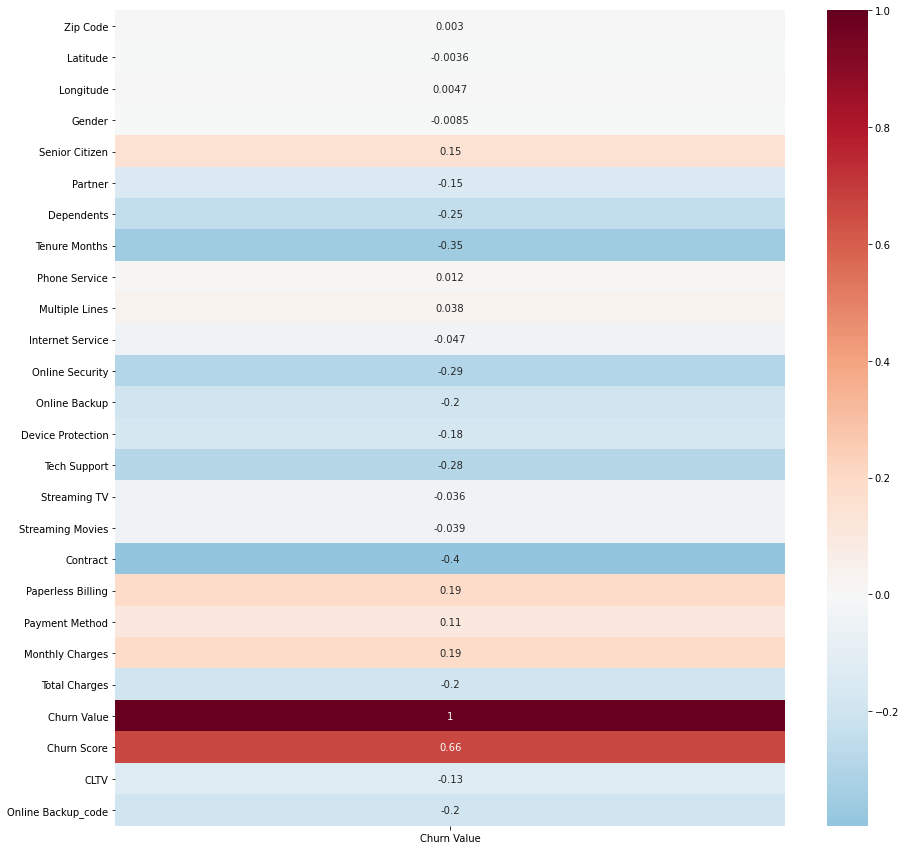

In [243]:
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr()[['Churn Value']],cmap="RdBu_r",center=0.0, annot=True);
c=df.corr()[['Churn Value']].abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

Churn Value  Latitude              0.001134
             Zip Code              0.001491
             Longitude             0.005877
             Gender                0.008545
             Phone Service         0.011691
             Internet Service      0.028472
             Streaming TV          0.037612
             Multiple Lines        0.037827
             Streaming Movies      0.039420
             Payment Method        0.103214
             CLTV                  0.124314
             Partner               0.149982
             Senior Citizen        0.150541
             Monthly Charges       0.184167
             Device Protection     0.185776
             Paperless Billing     0.191454
             Online Backup         0.202982
             Online Backup_code    0.202982
             Total Charges         0.232190
             Dependents            0.248140
             Tech Support          0.296569
             Online Security       0.303671
             Tenure Months      

<Figure size 720x360 with 0 Axes>

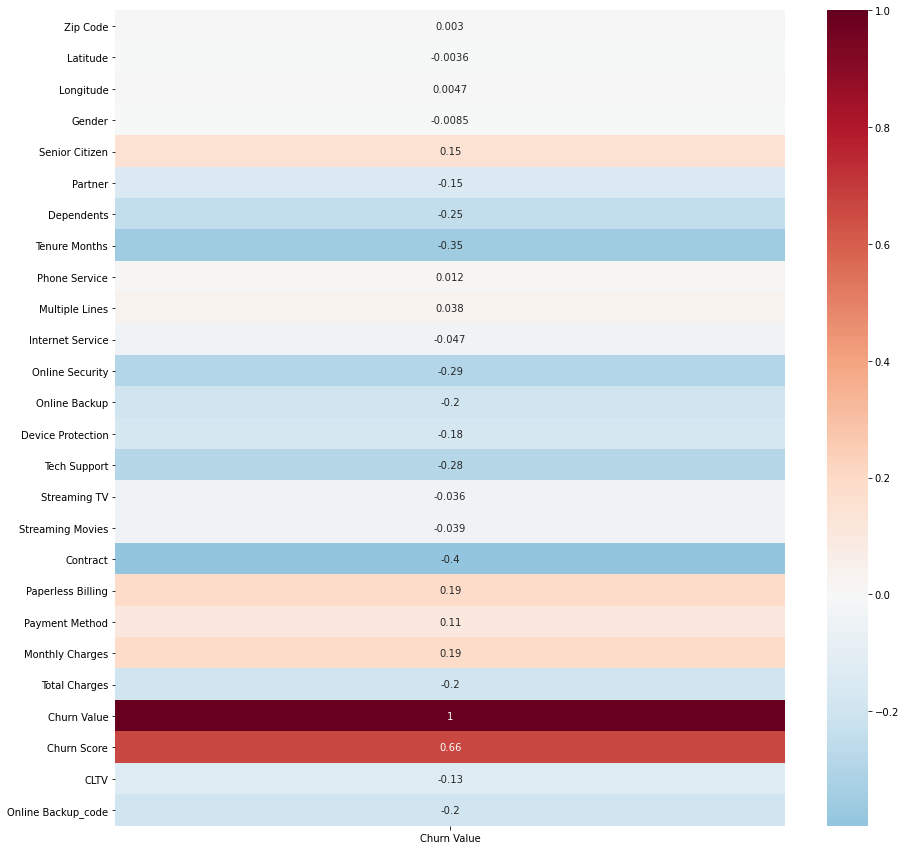

In [244]:
#Correlation with spearman
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr()[['Churn Value']],cmap="RdBu_r",center=0.0, annot=True);
c=df.corr(method='spearman')[['Churn Value']].abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

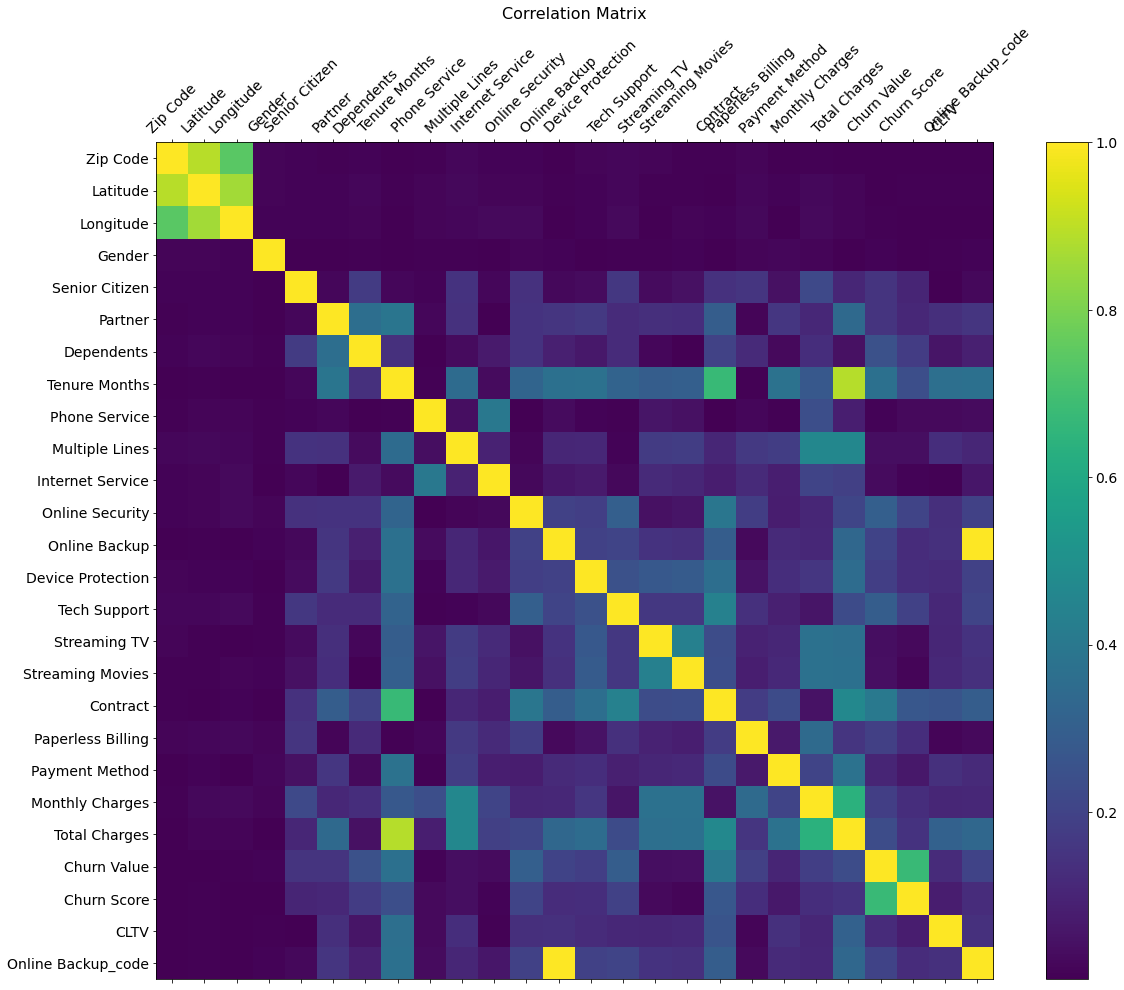

In [245]:
#Correlation matrix
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(method='spearman').abs(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [246]:
#Correlation in table form
corr = df.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

# Etude de cas d’ACP:Reduction de dimension

In [247]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
X=df

In [248]:
# Valeur moyenne
M=(df.drop('Churn Value', axis=1)).mean()
# Ecart-type
st=(df.drop('Churn Value', axis=1)).std()
# Ac centrée et reduite
Ac=((df.drop('Churn Value', axis=1))-M)/st
# la matrice de correlation C
C=Ac.corr()
# V contient les valeurs propres et D contient les vecteurs propres 
V, D=np.linalg.eig(C)
Up1=D[:,0:1]
Up1_POUR=(V[0]/sum(V))*100

print('le premier vecteur ne contient que 18 pourcent de linformation')
Up1_POUR

le premier vecteur ne contient que 18 pourcent de linformation


18.684400179717112

In [249]:
print('La somme des valeurs propres est :' , np.sum(V))
print('La trace de C est :' , np.trace(C))

La somme des valeurs propres est : 25.0
La trace de C est : 25.0


In [250]:
X=df.drop('Churn Value', axis=1)
sc=StandardScaler()
X=sc.fit_transform(X)
model=PCA(n_components=24)
X_reduce=model.fit_transform(X)


In [251]:
X_reduce.shape

(7032, 24)

In [252]:
 # pourcentage de variance pour chacune de nos composantes
model.explained_variance_ratio_

array([0.186844  , 0.10899684, 0.09712825, 0.06220064, 0.06005642,
       0.04766953, 0.0425257 , 0.04008828, 0.03771597, 0.03506793,
       0.03368249, 0.03341118, 0.03081995, 0.02834584, 0.02797113,
       0.02737256, 0.02338152, 0.02250124, 0.02000022, 0.01263573,
       0.00863143, 0.00772097, 0.00310599, 0.0021262 ])

In [253]:
X_reduce

array([[-2.19263601, -1.94547167, -0.70438929, ...,  0.33220221,
         0.37407451, -0.04998691],
       [-3.33968196, -1.97081961, -0.41673829, ..., -0.50090439,
         0.41826814,  0.0343743 ],
       [-0.6694198 , -2.37977986,  1.43707284, ..., -0.09222393,
         0.39298202,  0.32892946],
       ...,
       [ 3.83981174, -2.21427683,  0.9366674 , ...,  0.20702101,
         0.41696287, -0.32189306],
       [-2.42617112, -1.39412606, -1.42277572, ..., -0.2591074 ,
         0.10056478, -0.25418282],
       [ 2.97633634, -1.49415883,  0.0397077 , ..., -0.6770445 ,
         0.19177582, -0.21281085]])

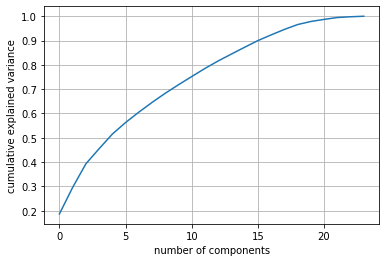

In [254]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.show()

In [255]:
# pour identifier le nombre de composantes pour garder 94% de l'information
np.argmax(np.cumsum(model.explained_variance_ratio_)>0.94)

17

In [256]:
sc=StandardScaler()
X=sc.fit_transform(X)
model=PCA(n_components=18)
X_reduce=model.fit_transform(X)

In [257]:
X_reduce

array([[-2.19263601, -1.94547167, -0.70438929, ..., -1.46315799,
        -0.18830999, -0.03090076],
       [-3.33968196, -1.97081961, -0.41673829, ..., -0.00639707,
         0.77132972,  0.00385143],
       [-0.6694198 , -2.37977986,  1.43707284, ..., -0.38584275,
         2.19329452,  0.22064503],
       ...,
       [ 3.83981174, -2.21427683,  0.9366674 , ..., -0.16961694,
         0.28232103,  0.02121918],
       [-2.42617112, -1.39412606, -1.42277572, ..., -1.78112613,
         0.25874524,  0.04643212],
       [ 2.97633634, -1.49415883,  0.0397077 , ..., -0.57926143,
         0.17608522,  0.08080251]])

In [258]:
X_reduce.shape

(7032, 18)

# Modéle KNN

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [260]:
df

Zip Code   Latitude   Longitude  Gender  Senior Citizen  Partner  \
0        90003  33.964131 -118.272783     1.0               0        0   
1        90005  34.059281 -118.307420     0.0               0        0   
2        90006  34.048013 -118.293953     0.0               0        0   
3        90010  34.062125 -118.315709     0.0               0        1   
4        90015  34.039224 -118.266293     1.0               0        0   
...        ...        ...         ...     ...             ...      ...   
7027     92285  34.341737 -116.539416     0.0               0        0   
7028     92301  34.667815 -117.536183     1.0               0        1   
7029     92304  34.559882 -115.637164     0.0               0        1   
7030     92305  34.167800 -116.864330     0.0               0        1   
7031     92308  34.424926 -117.184503     1.0               0        0   

      Dependents  Tenure Months  Phone Service  Multiple Lines  ...  \
0              0              2              1             0.0  ...   
1              1              2              1             0.0  ...   
2              1              8              1             2.0  ...   
3              1             28              1             2.0  ...   
4              1             49              1             2.0  ...   
...          ...            ...            ...             ...  ...   
7027           0             72              1             0.0  ...   
7028           1             24              1             2.0  ...   
7029           1             72              1             2.0  ...   
7030           1             11              0             1.0  ...   
7031           0             66              1             0.0  ...   

      Streaming Movies  Contract  Paperless Billing  Payment Method  \
0                  0.0       0.0                  1             3.0   
1                  0.0       0.0                  1             2.0   
2                  2.0       0.0                  1             2.0   
3                  2.0       0.0                  1             2.0   
4                  2.0       0.0                  1             0.0   
...                ...       ...                ...             ...   
7027               1.0       2.0                  1             0.0   
7028               2.0       1.0                  1             3.0   
7029               2.0       1.0                  1             1.0   
7030               0.0       0.0                  1             2.0   
7031               2.0       2.0                  1             0.0   

      Monthly Charges  Total Charges  Churn Value  Churn Score  CLTV  \
0            0.354229         108.15            1           86  3239   
1            0.521891         151.65            1           67  2701   
2            0.809950         820.50            1           86  5372   
3            0.861194        3046.05            1           84  5003   
4            0.850249        5036.30            1           89  5340   
...               ...            ...          ...          ...   ...   
7027         0.028856        1419.40            0           45  5306   
7028         0.662189        1990.50            0           59  2140   
7029         0.845274        7362.90            0           71  5560   
7030         0.112935         346.45            0           59  2793   
7031         0.869652        6844.50            0           38  5097   

      Online Backup_code  
0                    2.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    2.0  
...                  ...  
7027                 1.0  
7028                 0.0  
7029                 2.0  
7030                 0.0  
7031                 0.0  

[7032 rows x 26 columns]

In [261]:
x1=df.drop('Churn Value', axis=1)
y1=df['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=3)
KNN=KNeighborsClassifier(n_neighbors=3)
val_score=cross_val_score(KNN, X_train, y_train, cv=5)
val_score

array([0.68622222, 0.688     , 0.696     , 0.66844444, 0.67555556])

In [262]:

val_score=[]
K=np.arange(1,31)
for i in K:
    scores=cross_val_score(KNeighborsClassifier(i),X_train, y_train,cv=5)
    val_score.append(scores.mean())
print(val_score)

[0.6467555555555555, 0.7180444444444445, 0.6828444444444444, 0.7157333333333333, 0.7034666666666667, 0.7169777777777778, 0.7077333333333333, 0.7176888888888888, 0.711111111111111, 0.7239111111111111, 0.7166222222222222, 0.7249777777777778, 0.7198222222222223, 0.7281777777777777, 0.7256888888888888, 0.7295999999999999, 0.7285333333333334, 0.7276444444444444, 0.7292444444444445, 0.7315555555555555, 0.7292444444444445, 0.7299555555555556, 0.7281777777777777, 0.7310222222222222, 0.7292444444444446, 0.7329777777777778, 0.7340444444444445, 0.733688888888889, 0.7329777777777777, 0.7333333333333333]


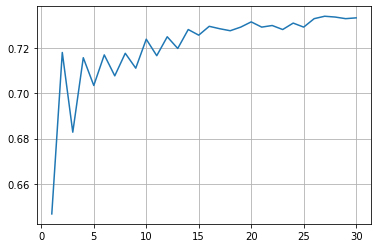

In [263]:
plt.plot(K, val_score)
plt.grid(True)
plt.show()

In [264]:
from sklearn.model_selection import validation_curve 
train_scores, test_scores = validation_curve(KNeighborsClassifier(),
                                             X_train, y_train,
                                             param_name= 'n_neighbors',
                                            param_range= np.arange(1,31),
                                            cv=5)

In [265]:
train_scores.mean(axis=1)

array([1.        , 0.82537778, 0.82551111, 0.78866667, 0.78911111,
       0.77075556, 0.76835556, 0.76137778, 0.76102222, 0.7564    ,
       0.75533333, 0.75288889, 0.75297778, 0.75133333, 0.75128889,
       0.75017778, 0.75213333, 0.74888889, 0.75155556, 0.74862222,
       0.74955556, 0.74755556, 0.74644444, 0.74564444, 0.74675556,
       0.74466667, 0.74613333, 0.74426667, 0.74528889, 0.74391111])

In [266]:
test_scores.mean(axis=1)

array([0.64675556, 0.71804444, 0.68284444, 0.71573333, 0.70346667,
       0.71697778, 0.70773333, 0.71768889, 0.71111111, 0.72391111,
       0.71662222, 0.72497778, 0.71982222, 0.72817778, 0.72568889,
       0.7296    , 0.72853333, 0.72764444, 0.72924444, 0.73155556,
       0.72924444, 0.72995556, 0.72817778, 0.73102222, 0.72924444,
       0.73297778, 0.73404444, 0.73368889, 0.73297778, 0.73333333])

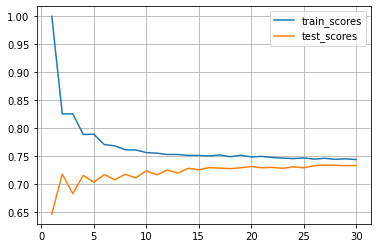

In [267]:
plt.plot(K, train_scores.mean(axis=1), K, test_scores.mean(axis=1))
plt.grid(True)
plt.legend(('train_scores', 'test_scores'))
plt.show()

In [268]:
param_grid = {'n_neighbors': np.arange(1,31),
              'p' : np.arange(1,10),
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [269]:
final_model =  KNeighborsClassifier(n_neighbors=30, p=5, algorithm='auto')
final_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30, p=5)

In [270]:
print('le test score est :' , final_model.score(X_test, y_test))
print('le train score est : ', final_model.score(X_train, y_train))

le test score est : 0.7192608386638237
le train score est :  0.7431111111111111


# Modéle KNN avec PCA

In [271]:
x1=X_reduce
y1=df['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=3)
KNN=KNeighborsClassifier(n_neighbors=3)
val_score=cross_val_score(KNN, X_train, y_train, cv=5)
val_score

array([0.81511111, 0.84711111, 0.83555556, 0.83288889, 0.86666667])

In [272]:
val_score=[]
K=np.arange(1,31)
for i in K:
    scores=cross_val_score(KNeighborsClassifier(i),X_train, y_train,cv=5)
    val_score.append(scores.mean())
print(val_score)

[0.8126222222222221, 0.8250666666666667, 0.8394666666666666, 0.8449777777777777, 0.8531555555555557, 0.8547555555555556, 0.861688888888889, 0.8632888888888889, 0.8654222222222222, 0.8652444444444445, 0.8684444444444445, 0.8693333333333333, 0.8684444444444445, 0.8702222222222222, 0.8718222222222222, 0.8741333333333332, 0.8743111111111113, 0.8744888888888889, 0.8734222222222222, 0.8728888888888889, 0.8728888888888887, 0.8723555555555557, 0.8752000000000001, 0.8741333333333333, 0.874311111111111, 0.8748444444444443, 0.8753777777777778, 0.8751999999999999, 0.8750222222222221, 0.877688888888889]


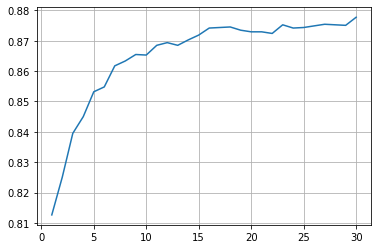

In [273]:
plt.plot(K, val_score)
plt.grid(True)
plt.show()

In [274]:
train_scores, test_scores = validation_curve(KNeighborsClassifier(),
                                             X_train, y_train,
                                             param_name= 'n_neighbors',
                                            param_range= np.arange(1,31),
                                            cv=5)

In [275]:
train_scores.mean(axis=1)

array([1.        , 0.90862222, 0.91564444, 0.90066667, 0.90182222,
       0.89604444, 0.89804444, 0.89404444, 0.89404444, 0.89302222,
       0.89235556, 0.89075556, 0.89022222, 0.88875556, 0.89022222,
       0.8884    , 0.88911111, 0.88831111, 0.88888889, 0.88906667,
       0.88831111, 0.88804444, 0.88791111, 0.88648889, 0.88644444,
       0.88631111, 0.8856    , 0.88613333, 0.88591111, 0.88662222])

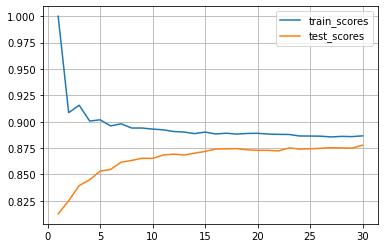

In [276]:
plt.plot(K, train_scores.mean(axis=1), K, test_scores.mean(axis=1))
plt.grid(True)
plt.legend(('train_scores', 'test_scores'))
plt.show()

In [277]:
param_grid = {'n_neighbors': np.arange(1,31),
              'p' : np.arange(1,10),
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [278]:
final_model =  KNeighborsClassifier(n_neighbors=30, p=5, algorithm='auto')
final_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30, p=5)

In [279]:
print('le test score est :' , final_model.score(X_test, y_test))
print('le train score est : ', final_model.score(X_train, y_train))

le test score est : 0.8678038379530917
le train score est :  0.8814222222222222


# Decision Tree

In [280]:
df1=df.copy()
y=df1["Churn Value"]
y.shape

(7032,)

y is the target variable

In [281]:
x=df1.drop("Churn Value",axis=1)
x.shape

(7032, 25)

In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y , train_size=0.7, random_state=3)

In [283]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

randon_state= 0 and criterion is set by default

In [284]:
dt.fit(X_train, y_train)
print('train_score=', dt.score(X_train, y_train))
print('test_score=', dt.score(X_test, y_test))

train_score= 1.0
test_score= 0.9156398104265403


overfitting problem

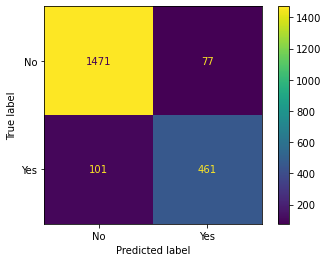

In [285]:
from sklearn.metrics import plot_confusion_matrix
labels=['No','Yes']
y_pred = dt.predict(X_test)
plot_confusion_matrix(dt, X_test, y_test, display_labels=labels)
plt.show()

In [286]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=labels, digits=6))

              precision    recall  f1-score   support

          No   0.935751  0.950258  0.942949      1548
         Yes   0.856877  0.820285  0.838182       562

    accuracy                       0.915640      2110
   macro avg   0.896314  0.885272  0.890565      2110
weighted avg   0.914743  0.915640  0.915044      2110



In [287]:
dt.feature_importances_

array([0.02880121, 0.02585785, 0.02955873, 0.00111082, 0.0016567 ,
       0.00729924, 0.01631745, 0.02709848, 0.0007671 , 0.00218736,
       0.01373994, 0.00505162, 0.00207101, 0.00356304, 0.00431567,
       0.00243692, 0.00444915, 0.08624106, 0.0027174 , 0.00706376,
       0.03919992, 0.0245769 , 0.6399947 , 0.02300927, 0.00091472])

In [288]:
x.columns

Index(['Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV',
       'Online Backup_code'],
      dtype='object')

In [289]:
all_features=['Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV',
       'Online Backup_code']

In [290]:
sum_importance=0
number_features=0
for var, importance in zip(all_features, dt.feature_importances_):
    if importance > 0.009:
        print(var, importance)
        number_features=number_features+1
        sum_importance=sum_importance+importance

print('the number of features is ',number_features)
print("la somme d'importance est= ",sum_importance)

Zip Code 0.028801208177345494
Latitude 0.025857848211346044
Longitude 0.02955873282394593
Dependents 0.01631744764595604
Tenure Months 0.027098476904044214
Internet Service 0.013739942682555448
Contract 0.08624106031915765
Monthly Charges 0.03919992045890605
Total Charges 0.024576895245682545
Churn Score 0.6399947019627238
CLTV 0.023009273932350527
the number of features is  11
la somme d'importance est=  0.9543955083640138


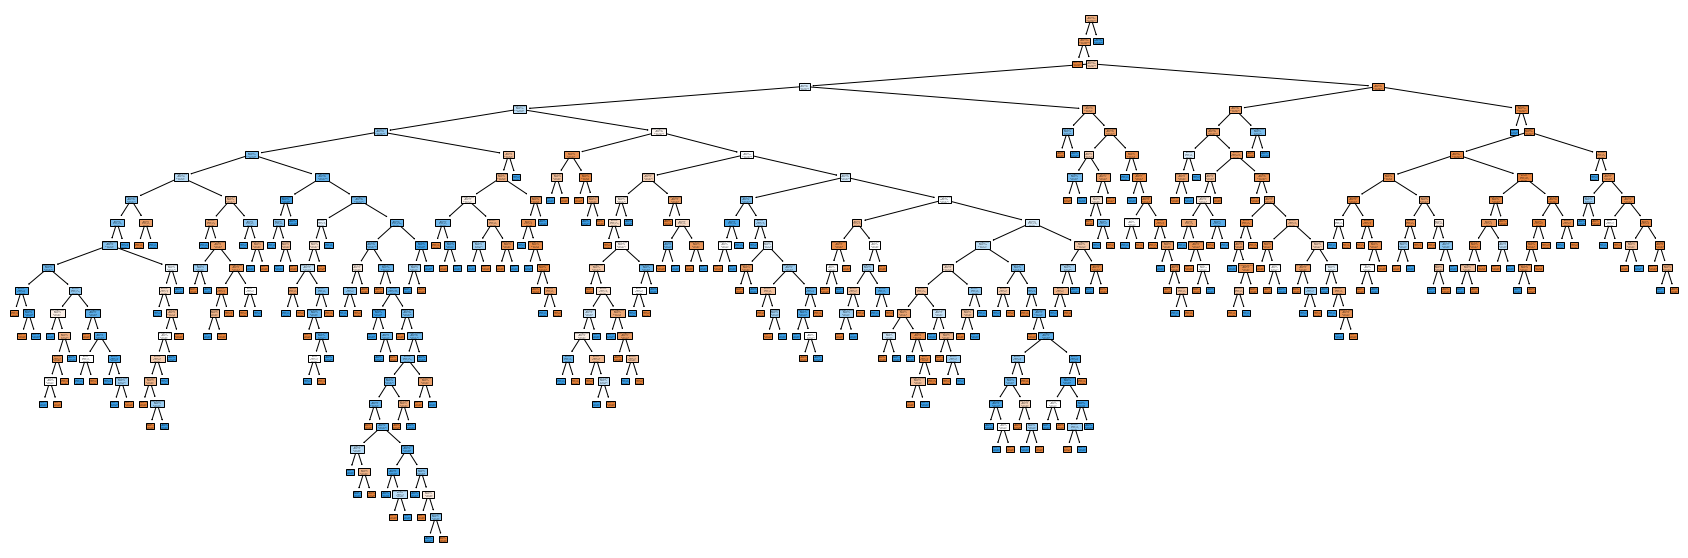

In [291]:
from sklearn.tree import plot_tree
labels=['No','Yes']
plt.figure(figsize=(30,10))
plot_tree(dt, feature_names= all_features, class_names=labels, filled=True)
plt.show()

in order to have the best model possible using decision_tree classifier , we will have to configure 2 hyperparameters :

- criterion
- max_depth in 1 ...9

In [292]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [293]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,10)}
#param_grid dictionnary that containts the 2 hyperparameters

In [294]:
from sklearn.model_selection import GridSearchCV
grid =GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=param_grid, cv=5 )
#cross vaildation = 5
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [295]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

now we can set the best model using these 2 hyperparameters

In [296]:
final_model_dt = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=6)
final_model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [297]:
print('train_score=', final_model_dt.score(X_train, y_train))
print('test_score=', final_model_dt.score(X_test, y_test))

train_score= 0.9240146281999188
test_score= 0.9175355450236967


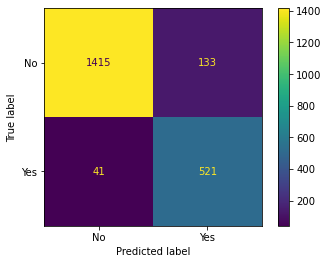

In [298]:
labels=['No','Yes']
y_pred = final_model_dt.predict(X_test)
plot_confusion_matrix(final_model_dt, X_test, y_test, display_labels=labels)
plt.show()

In [299]:
print(classification_report(y_test, y_pred, target_names=labels, digits=6))

              precision    recall  f1-score   support

          No   0.971841  0.914083  0.942077      1548
         Yes   0.796636  0.927046  0.856908       562

    accuracy                       0.917536      2110
   macro avg   0.884238  0.920564  0.899493      2110
weighted avg   0.925175  0.917536  0.919392      2110



In [300]:
all_features=['Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV',
       'Online Backup_code']
final_model_dt.feature_importances_

array([0.00531021, 0.        , 0.        , 0.        , 0.        ,
       0.00320106, 0.02415592, 0.00904299, 0.        , 0.        ,
       0.        , 0.00413992, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09190625, 0.        , 0.        ,
       0.01349246, 0.003818  , 0.84272277, 0.00221043, 0.        ])

In [301]:
sum_importance=0
number_features=0
for var, importance in zip(all_features,final_model_dt.feature_importances_):
    if importance > 0.009:
        print(var, importance)
        number_features=number_features+1
        sum_importance=sum_importance+importance

print('the number of features is ',number_features)
print("la somme d'importance est= ",sum_importance)

Dependents 0.024155917993741578
Tenure Months 0.00904298770037999
Contract 0.09190624913361581
Monthly Charges 0.01349245529755668
Churn Score 0.8427227725783144
the number of features is  5
la somme d'importance est=  0.9813203827036084


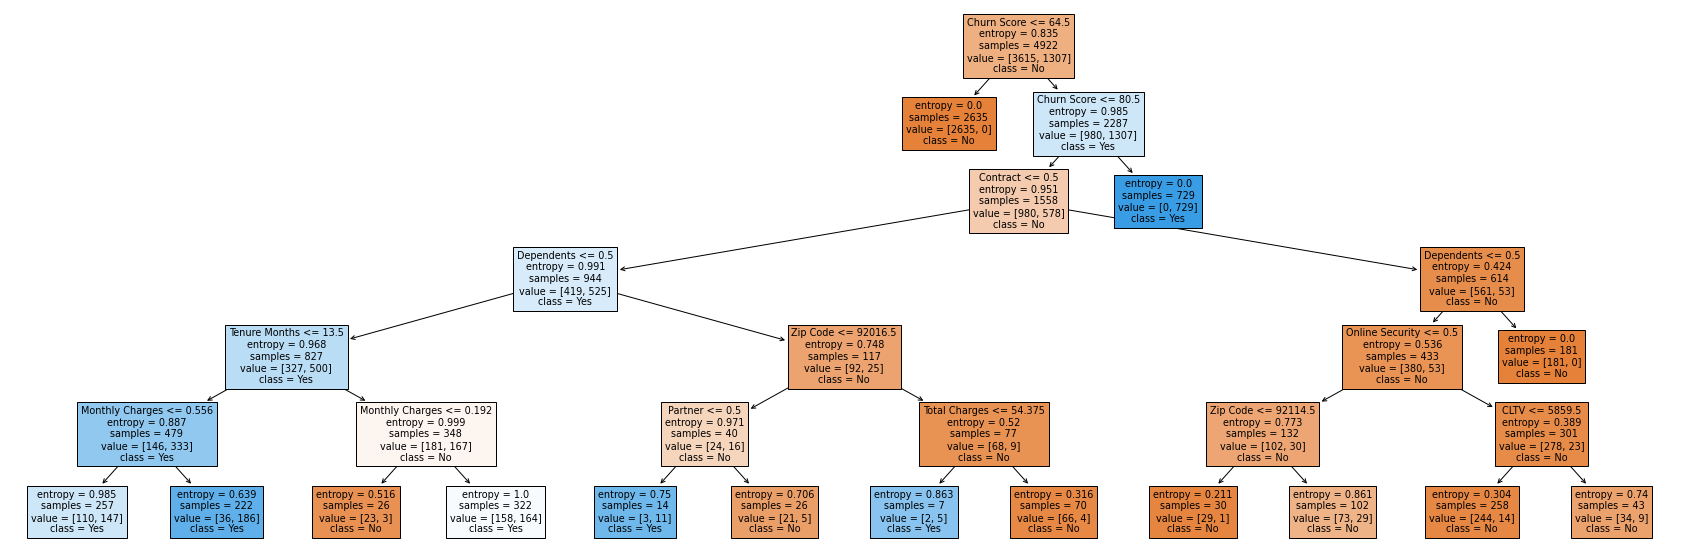

In [302]:
labels=['No','Yes']
plt.figure(figsize=(30,10))
plot_tree(final_model_dt, feature_names= all_features, class_names=labels, filled=True)
plt.show()

# Decision Tree avec PCA

In [303]:
x=X_reduce
y=df['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(x, y , train_size=0.7, random_state=3)

In [304]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [305]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,10)}
#param_grid dictionnary that containts the 2 hyperparameters

In [306]:
from sklearn.model_selection import GridSearchCV
grid =GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=param_grid, cv=5 )
#cross vaildation = 5
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [307]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [308]:
pca_dt = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=7)
pca_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [309]:
print('train_score=', pca_dt.score(X_train, y_train))
print('test_score=',pca_dt.score(X_test, y_test))

train_score= 0.9209670865501829
test_score= 0.852132701421801


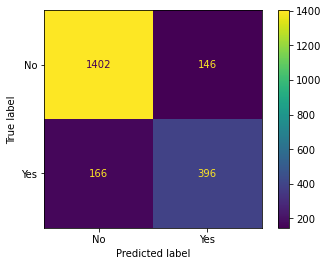

In [310]:
labels=['No','Yes']
y_pred = pca_dt.predict(X_test)
plot_confusion_matrix(pca_dt, X_test, y_test, display_labels=labels)
plt.show()

the decision tree model with PCA method applied on df doesn't improve at all train_score and test_score

# Decision tree (features selection using Recursive Feature Elimination (RFE))

In [311]:
df1=df.copy()
y=df1["Churn Value"]
x=df1.drop("Churn Value",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)

(5625, 25)
(1407, 25)


In [312]:
from sklearn.feature_selection import RFE
model=DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=18)
rfe.fit(X_train, y_train)
print("Sélection de variables", rfe.support_)
print("Classement de variables", rfe.ranking_)
print("Variables sélectionnées :", list(x.columns[rfe.support_]))

Sélection de variables [ True  True  True  True  True  True  True  True False False False  True
 False False  True  True False  True False  True  True  True  True  True
  True]
Classement de variables [1 1 1 1 1 1 1 1 7 2 8 1 3 5 1 1 6 1 4 1 1 1 1 1 1]
Variables sélectionnées : ['Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Online Security', 'Tech Support', 'Streaming TV', 'Contract', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV', 'Online Backup_code']


In [313]:
X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(5625, 18)
(1407, 18)


In [314]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,10)}

In [315]:
from sklearn.model_selection import GridSearchCV
grid =GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=param_grid, cv=5 )
#cross vaildation = 5
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [316]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [317]:
final_dt_model = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=6)
final_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [318]:
print('train_score=', final_dt_model.score(X_train, y_train))
print('test_score=',final_dt_model.score(X_test, y_test))

train_score= 0.9303111111111111
test_score= 0.9260838663823738


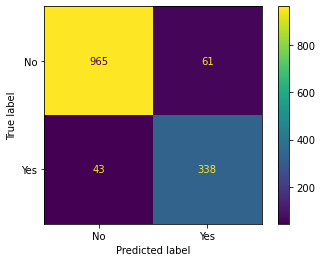

In [319]:
labels=['No','Yes']
y_pred = final_dt_model.predict(X_test)
plot_confusion_matrix(final_dt_model, X_test, y_test, display_labels=labels)
plt.show()

In [320]:
print(classification_report(y_test, y_pred, target_names=labels, digits=6))

              precision    recall  f1-score   support

          No   0.957341  0.940546  0.948869      1026
         Yes   0.847118  0.887139  0.866667       381

    accuracy                       0.926084      1407
   macro avg   0.902230  0.913842  0.907768      1407
weighted avg   0.927494  0.926084  0.926610      1407



In [321]:
all_features=['Zip Code', 'Latitude', 'Longitude', 'Gender', 'Partner', 'Dependents', 'Tenure Months', 'Multiple Lines', 'Online Security', 'Tech Support', 'Streaming TV', 'Contract', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV', 'Online Backup_code']
final_dt_model.feature_importances_

array([0.00261273, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02191534, 0.0189364 , 0.        , 0.        ,
       0.        , 0.09525755, 0.        , 0.01360551, 0.        ,
       0.84378032, 0.00246809, 0.00142406])

In [322]:
sum_importance=0
number_features=0
for var, importance in zip(all_features,final_dt_model.feature_importances_):
    if importance > 0.009:
        print(var, importance)
        number_features=number_features+1
        sum_importance=sum_importance+importance

print('the number of features is ',number_features)
print("la somme d'importance est= ",sum_importance)

Tenure Months 0.021915336469677967
Multiple Lines 0.018936402000587913
Contract 0.09525755407319134
Monthly Charges 0.01360551194123807
Churn Score 0.8437803184597857
the number of features is  5
la somme d'importance est=  0.9934951229444811


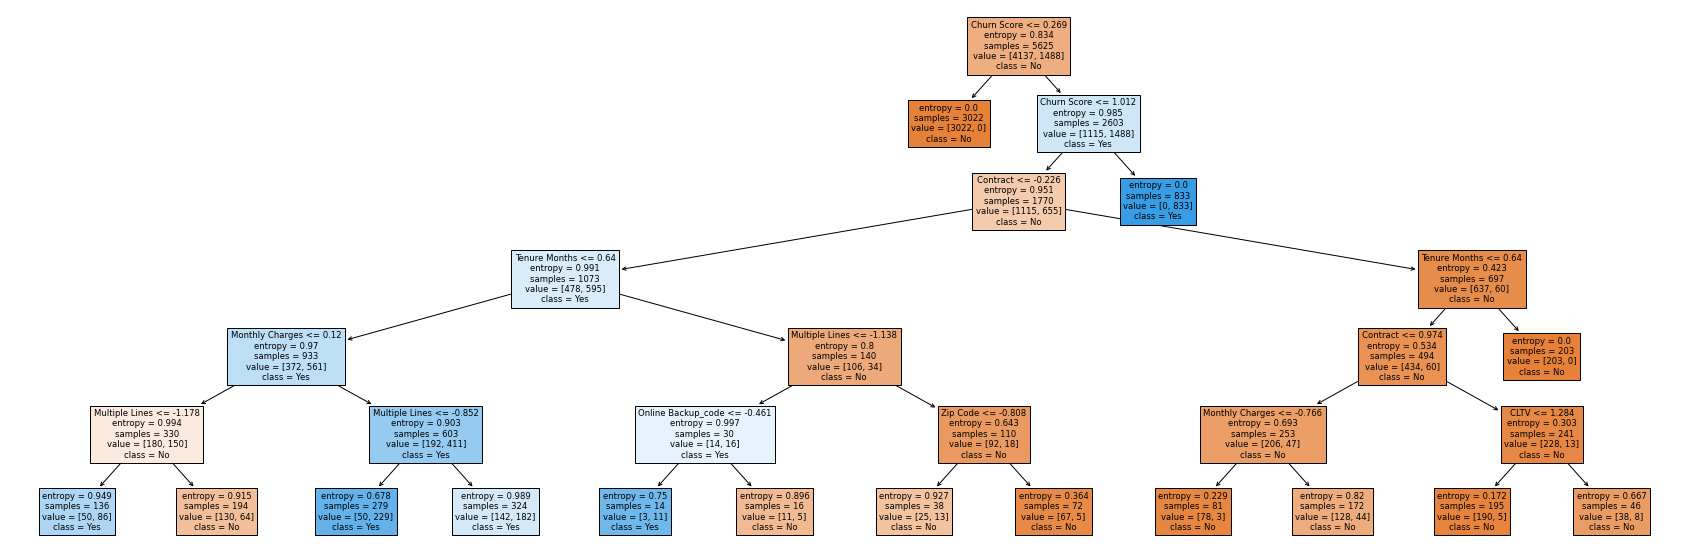

In [323]:
labels=['No','Yes']
plt.figure(figsize=(30,10))
plot_tree(final_dt_model, feature_names= all_features, class_names=labels, filled=True)
plt.show()

# Bayes Model

In [324]:
df1=df.copy()
y=df1["Churn Value"]
y.shape

(7032,)

In [325]:
x=df1.drop(["Latitude","Longitude","Churn Value"],axis=1)
x.shape

(7032, 23)

In [326]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train.shape

(6328, 23)

In [327]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [328]:
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.8731044215074713,
 'bernoulli': 0.7504754946955648,
 'multinomial': 0.525760635408276}

To use this model we have to check if there is strong correlation between the different features and eliminate the features that have strong correletion .

In [329]:
X_train.corr()

Zip Code    Gender  Senior Citizen   Partner  Dependents  \
Zip Code            1.000000  0.009022        0.000382 -0.007384    0.008611   
Gender              0.009022  1.000000       -0.001974 -0.006533    0.004826   
Senior Citizen      0.000382 -0.001974        1.000000  0.008253   -0.174182   
Partner            -0.007384 -0.006533        0.008253  1.000000    0.370626   
Dependents          0.008611  0.004826       -0.174182  0.370626    1.000000   
Tenure Months       0.000342  0.005547        0.013151  0.377318    0.137018   
Phone Service      -0.013989 -0.010822        0.007414  0.020553   -0.000090   
Multiple Lines     -0.016019 -0.009894        0.147715  0.141959   -0.029715   
Internet Service    0.005299 -0.003859       -0.034448 -0.000408    0.077641   
Online Security     0.010633 -0.015544       -0.132209  0.141802    0.130791   
Online Backup      -0.002379 -0.012512       -0.010844  0.153864    0.083621   
Device Protection   0.020798  0.003978       -0.025443  0.166834    0.053511   
Tech Support        0.017486 -0.006469       -0.152481  0.127500    0.116796   
Streaming TV        0.012313 -0.006737        0.025537  0.142107    0.020684   
Streaming Movies    0.011747 -0.007917        0.043932  0.134894    0.003934   
Contract            0.005599 -0.001254       -0.143108  0.295750    0.207040   
Paperless Billing  -0.009335 -0.008108        0.150769 -0.012822   -0.116775   
Payment Method     -0.005848  0.023455       -0.039220 -0.155872   -0.026899   
Monthly Charges    -0.005018 -0.014584        0.216653  0.100361   -0.138055   
Total Charges      -0.000482 -0.001681        0.098240  0.316494    0.036854   
Churn Score        -0.002205 -0.000661        0.103584 -0.110697   -0.177575   
CLTV               -0.007572 -0.009354       -0.002864  0.140505    0.058922   
Online Backup_code -0.002379 -0.012512       -0.010844  0.153864    0.083621   

                    Tenure Months  Phone Service  Multiple Lines  \
Zip Code                 0.000342      -0.013989       -0.016019   
Gender                   0.005547      -0.010822       -0.009894   
Senior Citizen           0.013151       0.007414        0.147715   
Partner                  0.377318       0.020553        0.141959   
Dependents               0.137018      -0.000090       -0.029715   
Tenure Months            1.000000       0.007692        0.340942   
Phone Service            0.007692       1.000000       -0.020770   
Multiple Lines           0.340942      -0.020770        1.000000   
Internet Service        -0.032715       0.389539       -0.106749   
Online Security          0.324293      -0.016447        0.004532   
Online Backup            0.372628       0.027717        0.118860   
Device Protection        0.372194       0.010309        0.123135   
Tech Support             0.321720      -0.017835        0.006351   
Streaming TV             0.290205       0.060003        0.173453   
Streaming Movies         0.304219       0.044922        0.177761   
Contract                 0.674806      -0.000573        0.106115   
Paperless Billing        0.002757       0.023060        0.165893   
Payment Method          -0.373725      -0.007970       -0.177564   
Monthly Charges          0.251027       0.250193        0.438159   
Total Charges            0.827349       0.113466        0.451834   
Churn Score             -0.220800       0.023338        0.044278   
CLTV                     0.396603       0.016823        0.129613   
Online Backup_code       0.372628       0.027717        0.118860   

                    Internet Service  Online Security  ...  Streaming TV  \
Zip Code                    0.005299         0.010633  ...      0.012313   
Gender                     -0.003859        -0.015544  ...     -0.006737   
Senior Citizen             -0.034448        -0.132209  ...      0.025537   
Partner                    -0.000408         0.141802  ...      0.142107   
Dependents                  0.077641         0.130791  ...      0.020684   
Tenure Mon

In [330]:
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns

this function allow us to determine how many correlated columns we have given a specific theshold 

In [331]:
cf = correlatedFeatures(X_train, 0.7)
cf

{'Online Backup_code', 'Total Charges'}

In [332]:
X_train = X_train.drop(cf, axis=1)
X_test = X_test.drop(cf, axis=1)
print(X_train.shape)
print(X_test.shape)

(6328, 21)
(704, 21)


we will use the gaussian model because it is the most conveniant for our dataframe

In [333]:
modele = GaussianNB()
modele.fit(X_train, y_train)

GaussianNB()

In [334]:
echantillon = [X_test.iloc[0, :]]
print ("echantillon: ", echantillon)

echantillon:  [Zip Code             93643.000000
Gender                   0.000000
Senior Citizen           0.000000
Partner                  1.000000
Dependents               0.000000
Tenure Months           42.000000
Phone Service            1.000000
Multiple Lines           2.000000
Internet Service         2.000000
Online Security          1.000000
Online Backup            1.000000
Device Protection        1.000000
Tech Support             1.000000
Streaming TV             1.000000
Streaming Movies         1.000000
Contract                 2.000000
Paperless Billing        0.000000
Payment Method           2.000000
Monthly Charges          0.069652
Churn Score             53.000000
CLTV                  3052.000000
Name: 2476, dtype: float64]


In [335]:
print ("predicted churn value: ", modele.predict(echantillon))
print ("probability: ", modele.predict_proba(echantillon))

predicted churn value:  [0]
probability:  [[9.99999920e-01 8.02574791e-08]]


In [336]:
modele.class_prior_

array([0.73609355, 0.26390645])

In [337]:
modele.class_count_

array([4658., 1670.])

In [338]:
y_pred = modele.predict(X_test)
print ("précision: ", accuracy_score(y_test, y_pred))
print ("précision: ", modele.score(X_test, y_test))

précision:  0.8863636363636364
précision:  0.8863636363636364


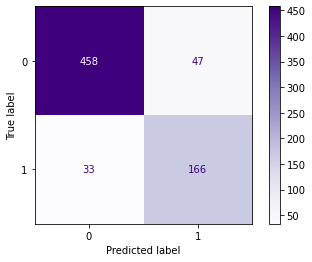

In [339]:
plot_confusion_matrix(modele, X_test, y_test, cmap="Purples")

In [340]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       505
           1       0.78      0.83      0.81       199

    accuracy                           0.89       704
   macro avg       0.86      0.87      0.86       704
weighted avg       0.89      0.89      0.89       704



# Random Forest

In [341]:
X=df.copy()
Features_model_RF=X.copy()

In [342]:
Features_model_RF.columns

Index(['Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score',
       'CLTV', 'Online Backup_code'],
      dtype='object')

In [343]:
Features_model_RF.shape

(7032, 26)

In [344]:
X_train, X_test, y_train, y_test= train_test_split(Features_model_RF,y, train_size=0.9, random_state=3,stratify=y)

In [345]:
robust = RobustScaler()
X_train=robust.fit_transform(X_train)
X_test=robust.transform(X_test)

In [346]:
model_RF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=1000,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [347]:
model_RF.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=1000, n_estimators=1, random_state=3)

In [348]:
print('Le train score est :', model_RF.score(X_train, y_train))
print('Le test score est :', model_RF.score(X_test, y_test))

Le train score est : 0.8358091024020228
Le test score est : 0.8295454545454546


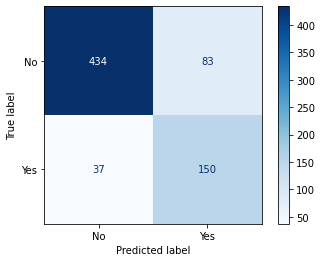

In [349]:
labels=['No','Yes']
plot_confusion_matrix(model_RF, X_test, y_test,display_labels=labels, cmap=plt.cm.Blues)
plt.show()

In [350]:
from sklearn.metrics import confusion_matrix
Y_pred = model_RF.predict(X_test)
print(confusion_matrix(y_test, y_pred))


[[359 158]
 [132  55]]


In [351]:
from sklearn.metrics import roc_auc_score
y_pred = model_RF.predict(X_test)
dt_auroc = roc_auc_score(y_test, y_pred)
print("Random Forest AUROC: {}".format(dt_auroc))
print(classification_report(y_test, y_pred, digits=8))


Random Forest AUROC: 0.820798725679827
              precision    recall  f1-score   support

           0  0.92144374 0.83945841 0.87854251       517
           1  0.64377682 0.80213904 0.71428571       187

    accuracy                      0.82954545       704
   macro avg  0.78261028 0.82079873 0.79641411       704
weighted avg  0.84768846 0.82954545 0.83491180       704

